In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [2]:
df_data=pd.read_csv("dataset_model.csv")

In [3]:
df_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 1.Perform Exploratory Data Analysis , Data Cleaning & Feature Engg on the Training dataset


In [4]:
#1.Understanding the data:-
df_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df_data.shape

(614, 13)

In [7]:
df_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df_data.nunique() #to check the unique value in each column:-

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
#Cleaning of data:-

In [11]:
df_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#3.Relationship analysis:-

In [13]:
corelation=df_data.corr()

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\896022361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=df_data.corr()


<Axes: >

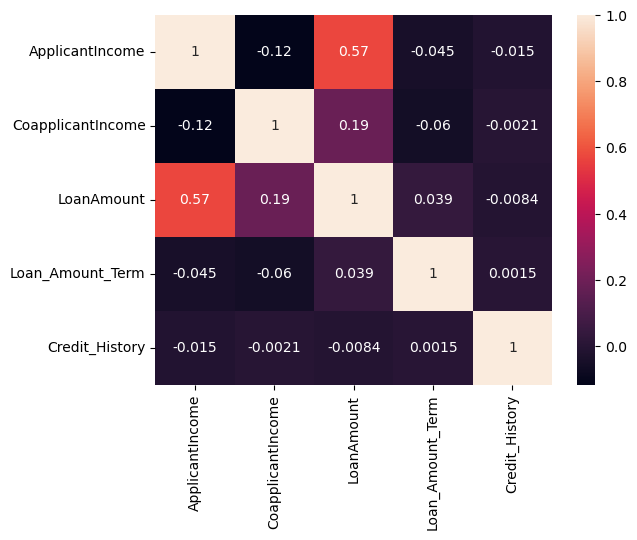

In [14]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

# Feature Engineering:-

# 1.1 Perform Label Encoding on Target Variable (Loan_Status).

In [15]:
label_encoder=LabelEncoder()

In [16]:
new_data=df_data.copy()

In [17]:
new_data["Loan_Status"]=label_encoder.fit_transform(df_data["Loan_Status"])

In [18]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# Step 2- Using dataframe from Step 1:


2.1Perform Label Encoding on Categorical Independent Variables.


In [19]:
new_data=df_data.copy()
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
new_data["Gender"]=label_encoder.fit_transform(new_data["Gender"])
new_data["Married"]=label_encoder.fit_transform(new_data["Married"])
new_data["Dependents"]=label_encoder.fit_transform(new_data["Dependents"])
new_data["Education"]=label_encoder.fit_transform(new_data["Education"])
new_data["Self_Employed"]=label_encoder.fit_transform(new_data["Self_Employed"])
new_data["Loan_Amount_Term"]=label_encoder.fit_transform(new_data["Loan_Amount_Term"])
new_data["Property_Area"]=label_encoder.fit_transform(new_data["Property_Area"])
new_data["Credit_History"]=label_encoder.fit_transform(new_data["Credit_History"])

In [21]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,1,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1,0,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1,2,Y


2.2.What is the shape of dataframe post Categorical Encoding ?


In [22]:
new_data.shape

(614, 13)

2.3Carry out Correlation analysis on this dataframe. Plot using HeatMap


In [23]:
new_data.corr()

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\594412850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.137736,-0.061180,-0.018755,-0.030903
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.148922,-0.078732,0.033224,0.007973
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.134371,-0.082453,-0.089960,0.032600
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.171133,-0.052948,-0.037534,-0.065243
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.091348,-0.021398,0.092270,-0.013439
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.570909,-0.045235,-0.033996,-0.009500
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.188619,-0.048613,0.068806,0.010522
LoanAmount,0.137736,0.148922,0.134371,-0.171133,0.091348,0.570909,0.188619,1.000000,0.021929,0.029004,-0.045792
Loan_Amount_Term,-0.061180,-0.078732,-0.082453,-0.052948,-0.021398,-0.045235,-0.048613,0.021929,1.000000,-0.042184,-0.073826
Credit_History,-0.018755,0.033224,-0.089960,-0.037534,0.092270,-0.033996,0.068806,0.029004,-0.042184,1.000000,0.019582


C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\301703442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr())


<Axes: >

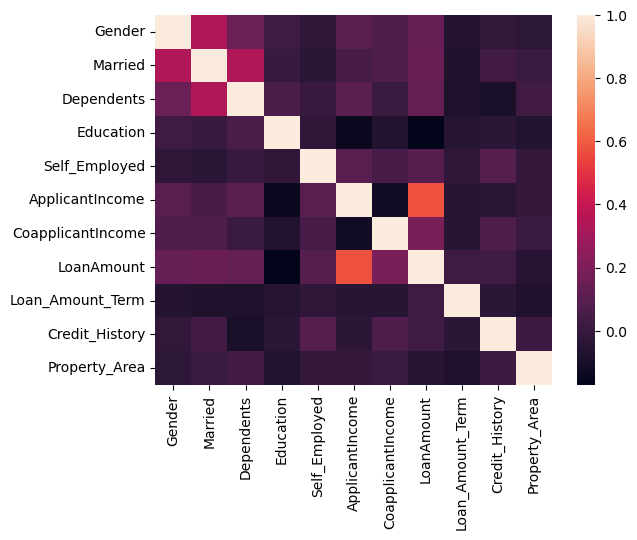

In [24]:
sns.heatmap(new_data.corr())

2.4Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)


In [25]:
new_data.corr()

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\594412850.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.137736,-0.061180,-0.018755,-0.030903
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.148922,-0.078732,0.033224,0.007973
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.134371,-0.082453,-0.089960,0.032600
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.171133,-0.052948,-0.037534,-0.065243
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.091348,-0.021398,0.092270,-0.013439
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.570909,-0.045235,-0.033996,-0.009500
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.188619,-0.048613,0.068806,0.010522
LoanAmount,0.137736,0.148922,0.134371,-0.171133,0.091348,0.570909,0.188619,1.000000,0.021929,0.029004,-0.045792
Loan_Amount_Term,-0.061180,-0.078732,-0.082453,-0.052948,-0.021398,-0.045235,-0.048613,0.021929,1.000000,-0.042184,-0.073826
Credit_History,-0.018755,0.033224,-0.089960,-0.037534,0.092270,-0.033996,0.068806,0.029004,-0.042184,1.000000,0.019582


In [26]:
def corr(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col.corr.add(colname)
        return col_corr

In [27]:
corr_features=corr(new_data,0.5)
len(set(corr_features))

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\1671577591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


0

In [28]:
def corr(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])<threshold:
                colname=corr_matrix.columns[i]
                col.corr.add(colname)
        return col_corr

In [29]:
corr_features=corr(new_data,0.5)
len(set(corr_features))

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\3132028885.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


0

# Step 3 - Using dataframe from Step 1:

3.1 Perform One Hot Encoding on Categorical Independent Variables.


On gender column

In [30]:
dummies=pd.get_dummies(new_data.Gender)
merged=pd.concat([new_data,dummies],axis="columns")
merged

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,1,2,Y,0,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,N,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,Y,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,Y,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,Y,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1,0,Y,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1,0,Y,0,1,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1,2,Y,0,1,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1,2,Y,0,1,0


In [31]:
dummies=pd.get_dummies(merged.Married)
merged2=pd.concat([merged,dummies],axis="columns")
merged2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,0,1,2
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,1,2,Y,0,1,0,1,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,N,0,1,0,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,Y,0,1,0,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,Y,0,1,0,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,Y,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1,0,Y,1,0,0,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1,0,Y,0,1,0,0,1,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1,2,Y,0,1,0,0,1,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1,2,Y,0,1,0,0,1,0


In [32]:
dummies=pd.get_dummies(merged2.Dependents)
merged3=pd.concat([merged2,dummies],axis="columns")
merged3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,1,2,0,1,2,0,1,2,3,4
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,...,1,0,1,0,0,1,0,0,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,...,1,0,0,1,0,0,1,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,...,1,0,0,1,0,1,0,0,0,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,...,1,0,0,1,0,1,0,0,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,...,0,0,1,0,0,1,0,0,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,...,1,0,0,1,0,0,0,0,1,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,...,1,0,0,1,0,0,1,0,0,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,...,1,0,0,1,0,0,0,1,0,0


In [33]:
dummies=pd.get_dummies(merged3.Education)
merged4=pd.concat([merged3,dummies],axis="columns")
merged4

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,0,1,2,0,1,2,3,4,0,1
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,...,1,0,0,1,0,0,0,0,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,...,0,1,0,0,1,0,0,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,...,0,1,0,1,0,0,0,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,...,0,1,0,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,...,1,0,0,1,0,0,0,0,1,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,...,0,1,0,0,0,0,1,0,1,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,...,0,1,0,0,1,0,0,0,1,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,...,0,1,0,0,0,1,0,0,1,0


In [34]:
dummies=pd.get_dummies(merged4.Self_Employed)
merged5=pd.concat([merged4,dummies],axis="columns")
merged5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,0,1,2,3,4,0,1,0,1,2
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,...,1,0,0,0,0,1,0,1,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,...,0,1,0,0,0,1,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,...,1,0,0,0,0,1,0,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,...,1,0,0,0,0,0,1,1,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,...,1,0,0,0,0,1,0,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,...,0,0,0,1,0,1,0,1,0,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,...,0,1,0,0,0,1,0,1,0,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,...,0,0,1,0,0,1,0,1,0,0


In [35]:
dummies=pd.get_dummies(merged5.Loan_Amount_Term)
merged6=pd.concat([merged5,dummies],axis="columns")
merged6

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,1,2,3,4,5,6,7,8,9,10
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,...,0,0,0,0,0,0,0,1,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,...,0,0,0,0,0,0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,...,0,0,0,0,0,0,0,1,0,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,...,0,0,0,0,0,0,0,1,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,...,0,0,0,0,0,0,0,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,...,0,0,0,0,1,0,0,0,0,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,...,0,0,0,0,0,0,0,1,0,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,...,0,0,0,0,0,0,0,1,0,0


In [36]:
dummies=pd.get_dummies(merged6.Credit_History)
merged7=pd.concat([merged6,dummies],axis="columns")
merged7

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,4,5,6,7,8,9,10,0,1,2
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,...,0,0,0,0,1,0,0,0,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,...,0,0,0,0,1,0,0,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,...,0,0,0,0,1,0,0,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,...,0,0,0,0,1,0,0,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,...,0,0,0,0,1,0,0,0,1,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,...,0,1,0,0,0,0,0,0,1,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,...,0,0,0,0,1,0,0,0,1,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,...,0,0,0,0,1,0,0,0,1,0


In [37]:
dummies=pd.get_dummies(merged7.Property_Area)
merged8=pd.concat([merged7,dummies],axis="columns")
merged8

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,7,8,9,10,0,1,2,0,1,2
0,LP001002,1,0,0,0,0,5849,0.0,NaN,8,...,0,1,0,0,0,1,0,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,...,0,1,0,0,0,1,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,...,0,1,0,0,0,1,0,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,...,0,1,0,0,0,1,0,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,...,0,1,0,0,0,1,0,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,...,0,0,0,0,0,1,0,1,0,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,...,0,1,0,0,0,1,0,0,0,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,...,0,1,0,0,0,1,0,0,0,1


3.2 What is the shape of dataframe post OHE Encoding ?


In [38]:
merged8.shape

(614, 46)

3.3 Carry out Correlation analysis on this dataframe. Plot using HeatMap


In [39]:
merged8.corr()

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\3504644758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged8.corr()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,7,8,9,10,0,1,2,0,1,2
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.137736,-0.061180,-0.018755,...,0.056273,-0.046170,-0.039590,-0.019229,0.003844,0.014665,-0.027387,0.075359,-0.091046,0.021140
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.148922,-0.078732,0.033224,...,0.033766,-0.062183,-0.062476,-0.004767,-0.014896,-0.012374,0.038108,-0.013153,0.011709,0.000629
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.134371,-0.082453,-0.089960,...,0.030857,-0.090338,0.031751,-0.036917,0.082888,-0.038094,-0.048405,-0.031117,0.005424,0.024496
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.171133,-0.052948,-0.037534,...,0.004461,-0.113773,0.018553,0.077783,0.073658,-0.081637,0.030102,0.077520,-0.039410,-0.034279
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.091348,-0.021398,0.092270,...,-0.001931,-0.006109,-0.050681,0.013703,-0.062019,0.000380,0.079251,0.023049,-0.021382,-0.000211
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.570909,-0.045235,-0.033996,...,0.067018,-0.038677,-0.026042,-0.031836,0.018615,0.006986,-0.034651,0.015829,-0.014246,-0.000598
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.188619,-0.048613,0.068806,...,0.033155,-0.045200,-0.032920,0.005756,-0.011134,-0.058795,0.104297,0.005329,-0.027044,0.022776
LoanAmount,0.137736,0.148922,0.134371,-0.171133,0.091348,0.570909,0.188619,1.000000,0.021929,0.029004,...,0.067884,0.021745,0.010159,-0.054958,0.001463,-0.035156,0.051531,0.043942,-0.008401,-0.034003
Loan_Amount_Term,-0.061180,-0.078732,-0.082453,-0.052948,-0.021398,-0.045235,-0.048613,0.021929,1.000000,-0.042184,...,-0.090371,0.553180,0.175379,0.300867,0.033917,-0.009533,-0.029072,0.044171,0.036971,-0.080909
Credit_History,-0.018755,0.033224,-0.089960,-0.037534,0.092270,-0.033996,0.068806,0.029004,-0.042184,1.000000,...,0.019811,0.079076,-0.045803,-0.118257,-0.817705,0.249010,0.671540,-0.019990,0.005692,0.013457


C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\4081922429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged8.corr())


<Axes: >

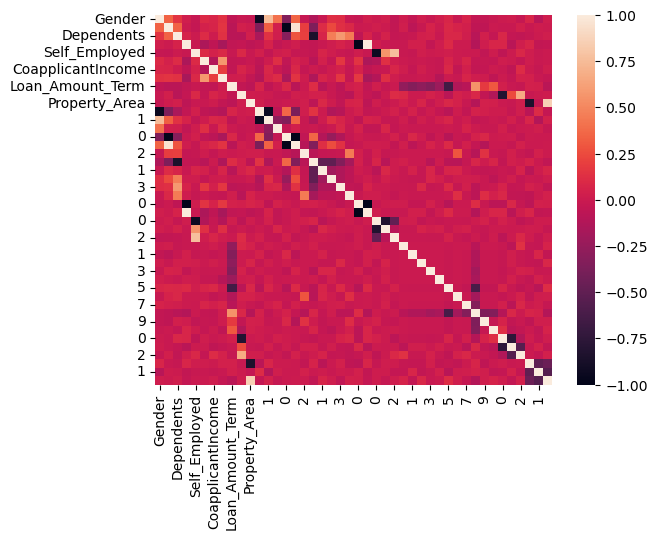

In [40]:
sns.heatmap(merged8.corr())

3.4 Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)


In [41]:
def corr(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col.corr.add(colname)
        return col_corr

In [42]:
len(set(corr(merged8,0.5)))

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\1671577591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


0

In [43]:
def corr(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])<threshold:
                colname=corr_matrix.columns[i]
                col.corr.add(colname)
        return col_corr

In [44]:
len(set(corr(merged8,0.5)))

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\3132028885.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=dataset.corr()


0

# 2.Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe


In [45]:
#The loan_Id field has the unique records in the entire dataset :-
print(len(df_data["Loan_ID"].unique()))
print("")
print(pd.value_counts(df_data["Loan_ID"]))

614

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


In [46]:
#Copying the "Loan_Id" column to an another dataframe data_id :-
df_id=df_data["Loan_ID"]

#Dropping the "Loan_ID" from the original dataframe :-
df_data=df_data.drop(columns="Loan_ID")
df_data.columns



Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# 3. Identifying Continous & Categorical Columns

In [47]:
#To display all the Continuous fields :-
num_cols=df_data._get_numeric_data().columns
cont_cols=[]
for i in num_cols:
    if(len(df_data[i].unique()))>int(df_data.shape[0]/25):
        cont_cols.append(i)
print(cont_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [48]:
#To display all the categorical fields :-
cat_cols=list(set(df_data.columns)-set(cont_cols))
print(cat_cols)

['Loan_Status', 'Credit_History', 'Loan_Amount_Term', 'Property_Area', 'Dependents', 'Self_Employed', 'Education', 'Married', 'Gender']


# 4.Performing Uni-variate Analysis with Plots.Record your Observations

Text(0, 0.5, 'frequency')

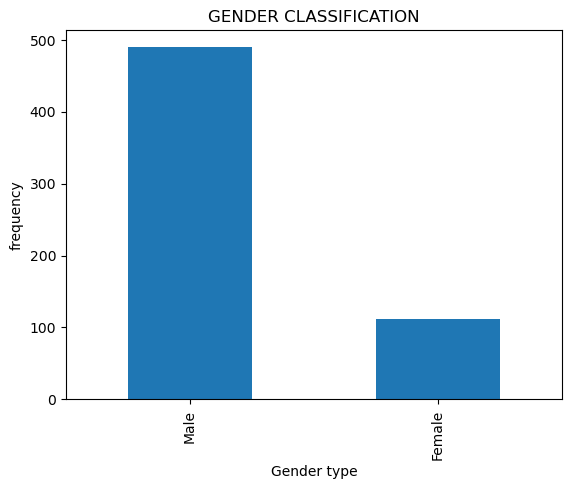

In [49]:
#Plotting barplot for categorical data("Gender")
ax=df_data["Gender"].value_counts().plot(kind="bar")
ax.set_title("GENDER CLASSIFICATION")
ax.set_xlabel("Gender type")
ax.set_ylabel("frequency")

# Inferences:-

In [50]:
#The males are approx 500 in number than compare to the female of the who are approx 110 in number.

Text(0, 0.5, 'frequency')

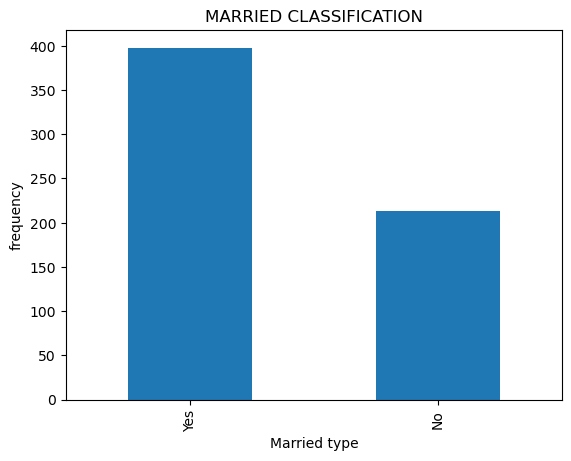

In [51]:
#Plotting barplot for categorical data("Married")
ax=df_data["Married"].value_counts().plot(kind="bar")
ax.set_title("MARRIED CLASSIFICATION")
ax.set_xlabel("Married type")
ax.set_ylabel("frequency")

# Inferences:- 

In [52]:
#The Yes are approx 400 in number than compare to the No of the who are approx 110 in number.

Text(0, 0.5, 'frequency')

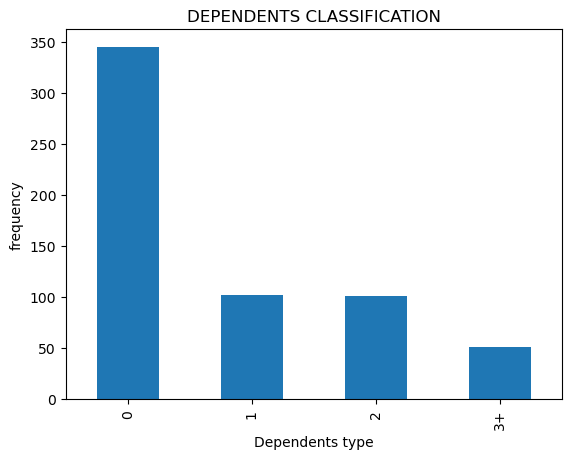

In [53]:
#Plotting barplot for categorical data("Dependents")
ax=df_data["Dependents"].value_counts().plot(kind="bar")
ax.set_title("DEPENDENTS CLASSIFICATION")
ax.set_xlabel("Dependents type")
ax.set_ylabel("frequency")

# Inferences:-

In [54]:
#The O in the dependents is having the highest density and 3+ is having the least Density

Text(0, 0.5, 'frequency')

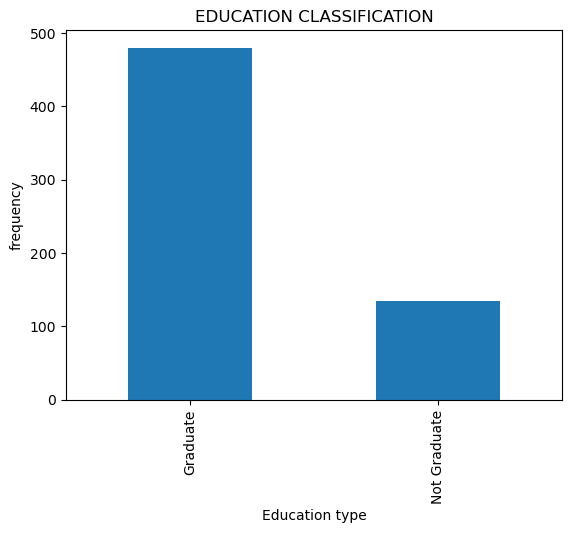

In [55]:
#Plotting barplot for categorical data("Eductaion")
ax=df_data["Education"].value_counts().plot(kind="bar")
ax.set_title("EDUCATION CLASSIFICATION")
ax.set_xlabel("Education type")
ax.set_ylabel("frequency")

# Inferences:-

In [56]:
#THE GRADUATES ARE HAVING THE HIGHEST DENSITY.

Text(0, 0.5, 'frequency')

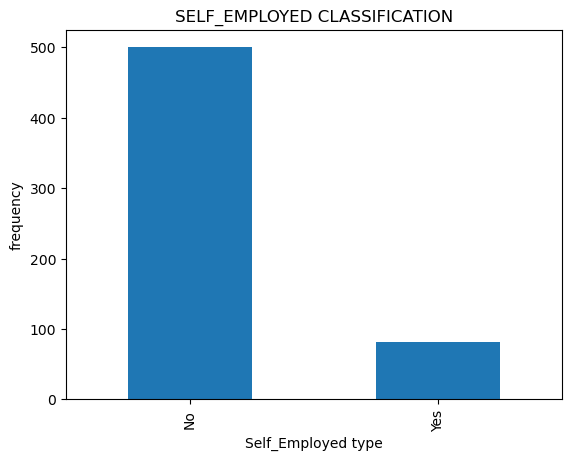

In [57]:
#Plotting barplot for categorical data("Self_Employed")
ax=df_data["Self_Employed"].value_counts().plot(kind="bar")
ax.set_title("SELF_EMPLOYED CLASSIFICATION")
ax.set_xlabel("Self_Employed type")
ax.set_ylabel("frequency")

# Inferences:-

In [58]:
#The people who are not self employed are more in number than compare to the ones who are self employed.

Text(0, 0.5, 'frequency')

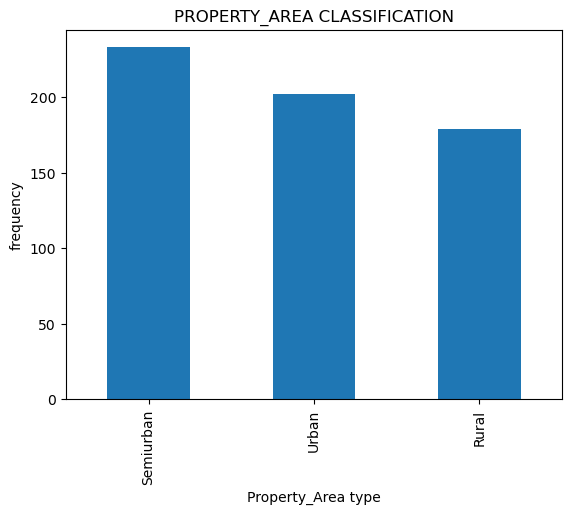

In [59]:
#Plotting barplot for categorical data("Property_Area")
ax=df_data["Property_Area"].value_counts().plot(kind="bar")
ax.set_title("PROPERTY_AREA CLASSIFICATION")
ax.set_xlabel("Property_Area type")
ax.set_ylabel("frequency")

# Inferences:-

In [60]:
#The Property_Area with Semiurban category is highest in number than compare to the other 2

Text(0, 0.5, 'frequency')

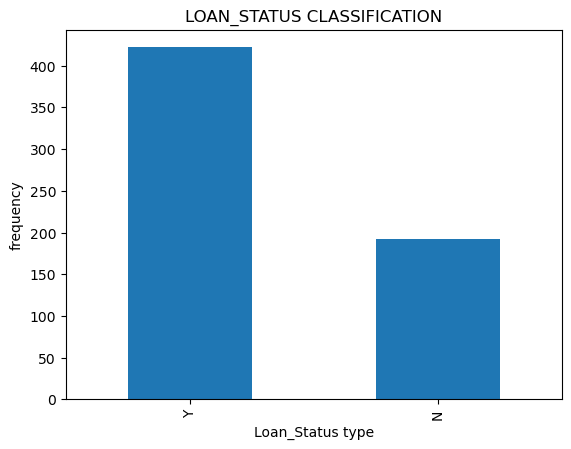

In [61]:
#Plotting barplot for categorical data("Loan_Status")
ax=df_data["Loan_Status"].value_counts().plot(kind="bar")
ax.set_title("LOAN_STATUS CLASSIFICATION")
ax.set_xlabel("Loan_Status type")
ax.set_ylabel("frequency")

# Inferences:-

In [62]:
#People with Loan_Status as "Yes" are highest.

Text(0, 0.5, 'frequency')

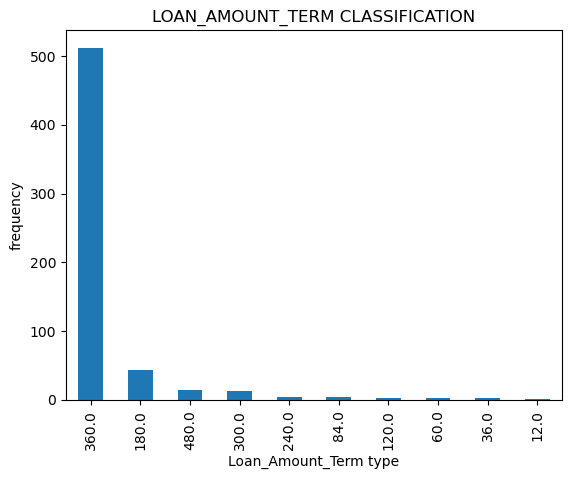

In [63]:
#Plotting barplot for categorical data("Loan_Amount_Term")
ax=df_data["Loan_Amount_Term"].value_counts().plot(kind="bar")
ax.set_title("LOAN_AMOUNT_TERM CLASSIFICATION")
ax.set_xlabel("Loan_Amount_Term type")
ax.set_ylabel("frequency")

# Inferences:-

In [64]:
#More than 500 peoples are having the category as 360.0 and approximately 0 people are having the category as 12.0

Text(0, 0.5, 'frequency')

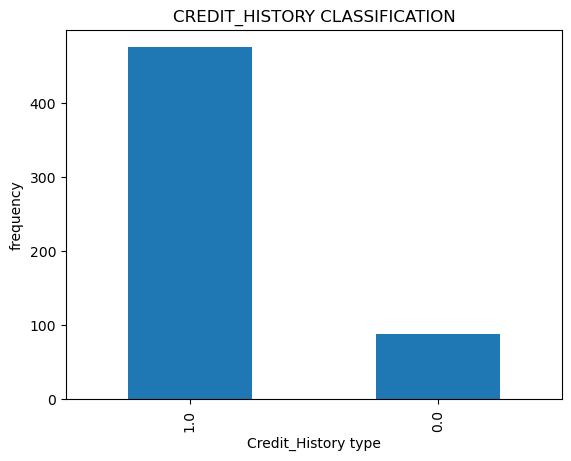

In [65]:
#Plotting barplot for categorical data("Credit_history")
ax=df_data["Credit_History"].value_counts().plot(kind="bar")
ax.set_title("CREDIT_HISTORY CLASSIFICATION")
ax.set_xlabel("Credit_History type")
ax.set_ylabel("frequency")

# Inferences:- 

In [66]:
#Approx 500 peoples are ahving a credit_history as 1.0.

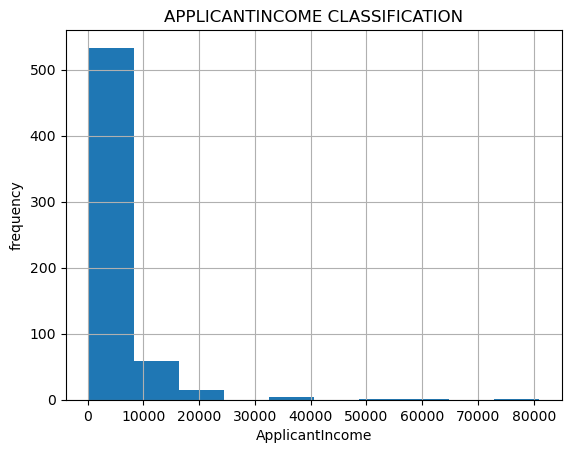

In [67]:
#Plotting Histogram for continuous data("ApplicantIncome")
df_data["ApplicantIncome"].hist()
plt.xlabel("ApplicantIncome")
plt.ylabel("frequency")
plt.title("APPLICANTINCOME CLASSIFICATION")
plt.show()

# Inferences:-

In [68]:
#Approx 550 peoples are hvaing their Income between 0-10000 and few people are having their income between 30000-40000.

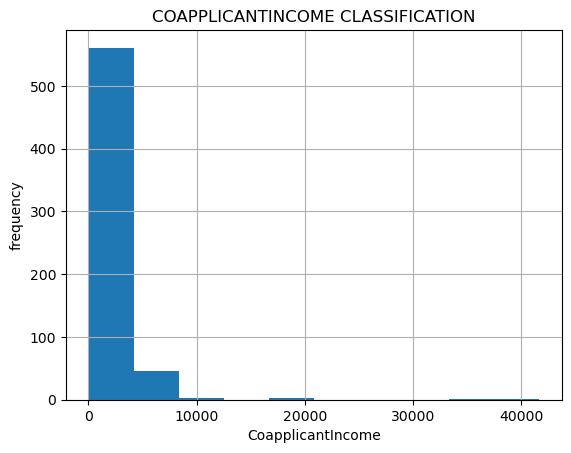

In [69]:
#Plotting histogram for continuous data("CoapplicantIncome")
df_data["CoapplicantIncome"].hist()
plt.xlabel("CoapplicantIncome")
plt.ylabel("frequency")
plt.title("COAPPLICANTINCOME CLASSIFICATION")
plt.show()

# Inferences:-

In [70]:
#Majority of the coapplicant are having their salary between 0-10000 and very few are having between 10500-20000

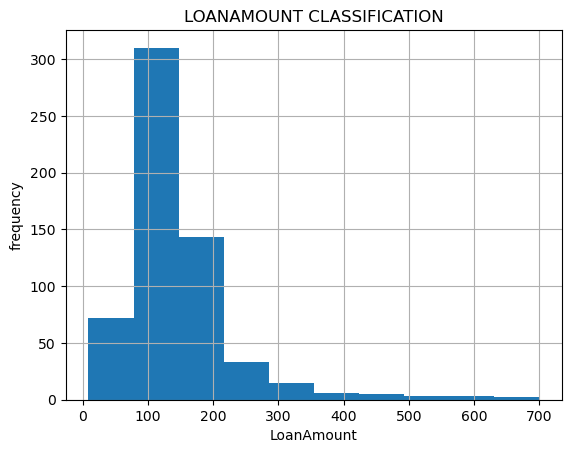

In [71]:
#Plotting histogram for continuous data("LoanAmount")
df_data["LoanAmount"].hist()
plt.xlabel("LoanAmount")
plt.ylabel("frequency")
plt.title("LOANAMOUNT CLASSIFICATION")
plt.show()

# Inferences:-

In [72]:
#Majority of the people are having their loanamount between the range 90-200 and very few are having between 400-700

# 5.Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations


# # CHECKING DEPENDENCY OF CONTINUOUS VS CONTINUOUS COLUMNS:-

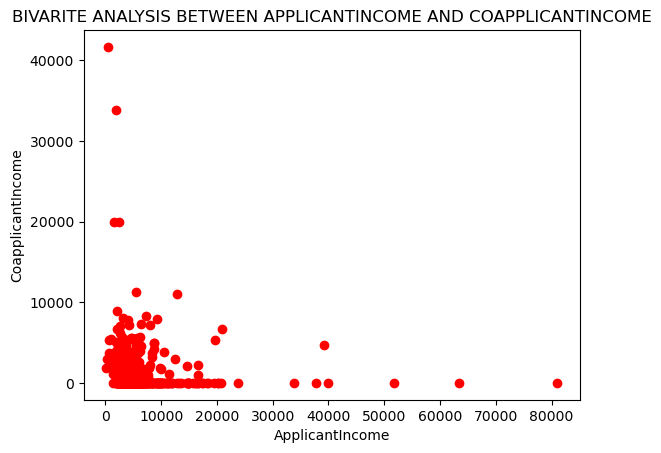

In [73]:
#Bivarite Analysis Between Applicant Income and Coapplicant Income:-
plt.scatter(df_data["ApplicantIncome"],df_data["CoapplicantIncome"],c="red")
plt.title("BIVARITE ANALYSIS BETWEEN APPLICANTINCOME AND COAPPLICANTINCOME")
plt.xlabel("ApplicantIncome")
plt.ylabel("CoapplicantIncome")
plt.show()

# Inferences:-

In [74]:
#Majority of the applicant are having their applicantincome in the range 0-20000 and coapplicant income between 0-10000 and very few are having beyond that.

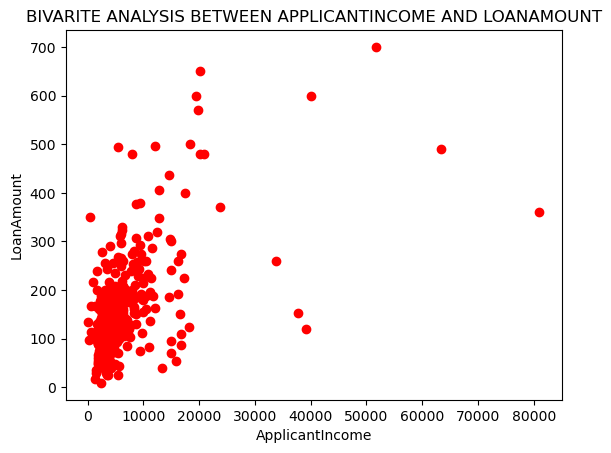

In [75]:
#Bivarite Analysis Between Applicant Income and loanAmount:-
plt.scatter(df_data["ApplicantIncome"],df_data["LoanAmount"],c="red")
plt.title("BIVARITE ANALYSIS BETWEEN APPLICANTINCOME AND LOANAMOUNT")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

# Inferences:-

In [76]:
#Majority of the applicants are having their loan_amount between 0-300 and income between 0-20000 and very few beyond that.

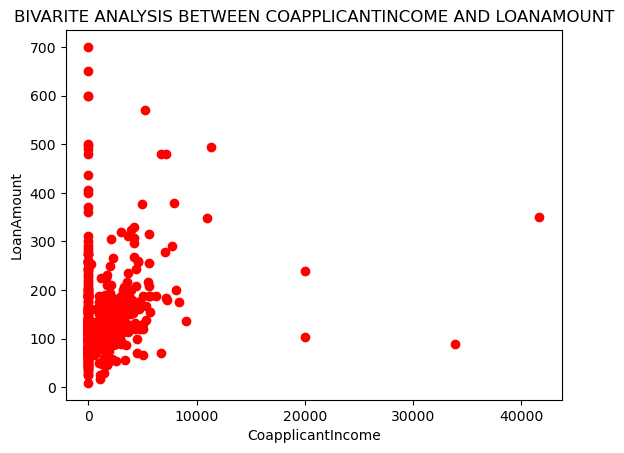

In [77]:
#Bivarite Analysis Between Coapplicant Income and LoanAmount:-
plt.scatter(df_data["CoapplicantIncome"],df_data["LoanAmount"],c="red")
plt.title("BIVARITE ANALYSIS BETWEEN COAPPLICANTINCOME AND LOANAMOUNT")
plt.xlabel("CoapplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

# Inferences:-

In [78]:
#Majority of the applicants are having their loan_amount between 0-350 and income between 0-5000 and very few beyond that.

# CHECKING DEPENDENCY OF TWO CATEGORICAL COLUMNS:-

Married   No  Yes
Gender           
Female    80   31
Male     130  357


<Axes: xlabel='Married', ylabel='Gender'>

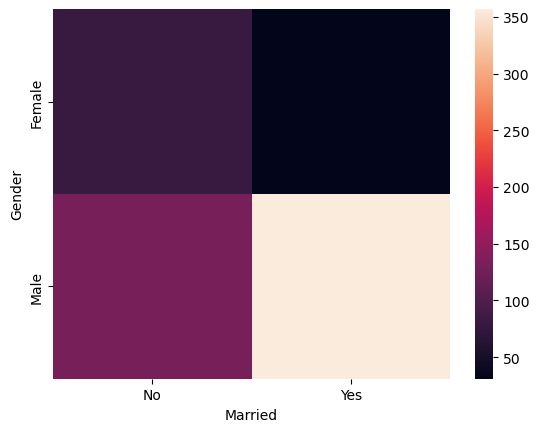

In [79]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Married"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Married"]))

# Inferences:-

In [80]:
#majority of the gender is male with married status as Yes

Dependents    0   1   2  3+
Gender                     
Female       80  19   7   3
Male        258  82  92  45


<Axes: xlabel='Dependents', ylabel='Gender'>

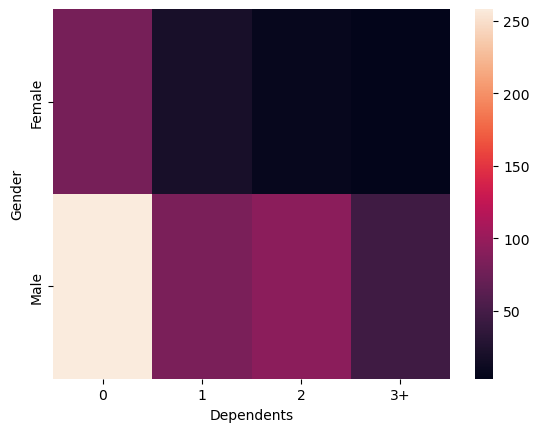

In [81]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Dependents"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Dependents"]))

# Inferences:-

In [82]:
#Majority of the gender is male and with the dependents as 0 and other dependents are distributed throughout

Education  Graduate  Not Graduate
Gender                           
Female           92            20
Male            376           113


<Axes: xlabel='Education', ylabel='Gender'>

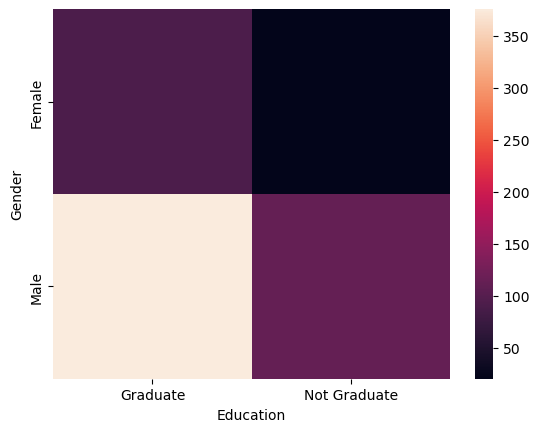

In [83]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Education"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Education"]))


# Inferences:-

In [84]:
#majority of the Gender is male with Education Status as graduate and very few females with not graduate 

Self_Employed   No  Yes
Gender                 
Female          89   15
Male           402   63


<Axes: xlabel='Self_Employed', ylabel='Gender'>

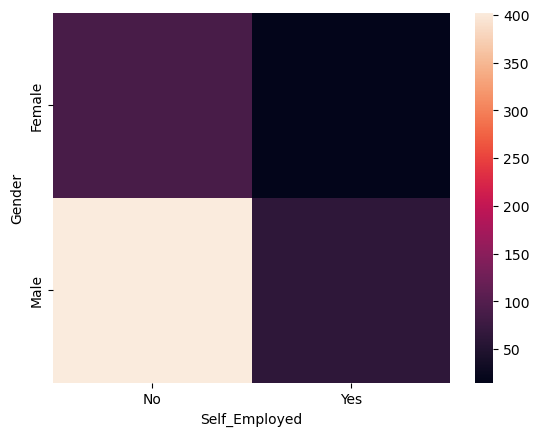

In [85]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Self_Employed"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Self_Employed"]))

# Inferences:-

In [86]:
#majority of the Gender is male with Self_employed Status as No and very few females with Yes

Property_Area  Rural  Semiurban  Urban
Gender                                
Female            24         55     33
Male             151        172    166


<Axes: xlabel='Property_Area', ylabel='Gender'>

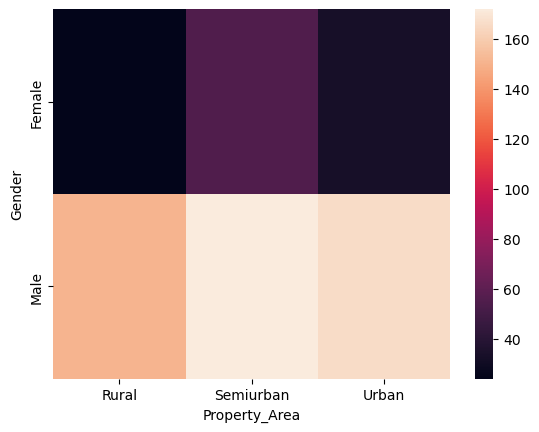

In [87]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Property_Area"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Property_Area"]))

# Inferences:-

In [88]:
#majority of the Gender is male with property_area Status as SemiUrban and very few females with Rural Status

Loan_Amount_Term  12.0   36.0   60.0   84.0   120.0  180.0  240.0  300.0  \
Gender                                                                     
Female                0      1      0      1      0      3      1      1   
Male                  1      1      2      3      3     40      3     11   

Loan_Amount_Term  360.0  480.0  
Gender                          
Female               98      4  
Male                403     11  


<Axes: xlabel='Loan_Amount_Term', ylabel='Gender'>

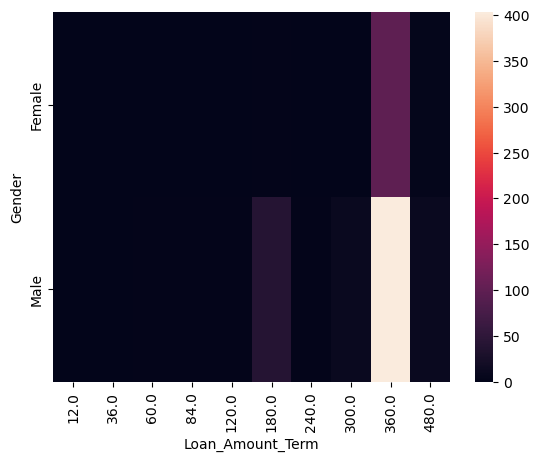

In [89]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Loan_Amount_Term"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Loan_Amount_Term"]))

# Inferences:-

In [90]:
#majority of the Gender is male with Loan_Amount_Term as 360.0 and approx 0 females are having other loan amount term categories

Credit_History  0.0  1.0
Gender                  
Female           17   84
Male             69  382


<Axes: xlabel='Credit_History', ylabel='Gender'>

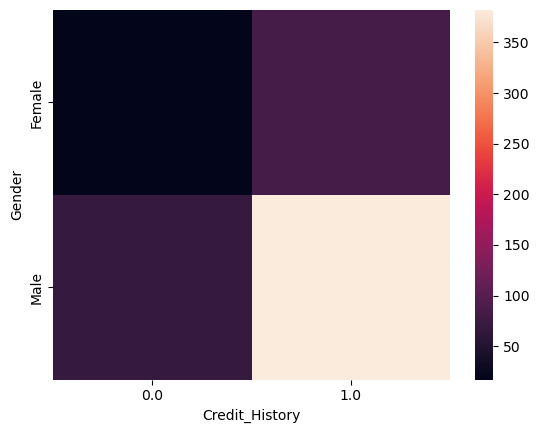

In [91]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Credit_History"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Credit_History"]))

# Inferences:-

In [92]:
#majority of the Gender is male with Credit_History Status as 1.0 and very few females with 0.0 

Dependents    0   1   2  3+
Married                    
No          171  23   8   7
Yes         174  79  93  44


<Axes: xlabel='Dependents', ylabel='Married'>

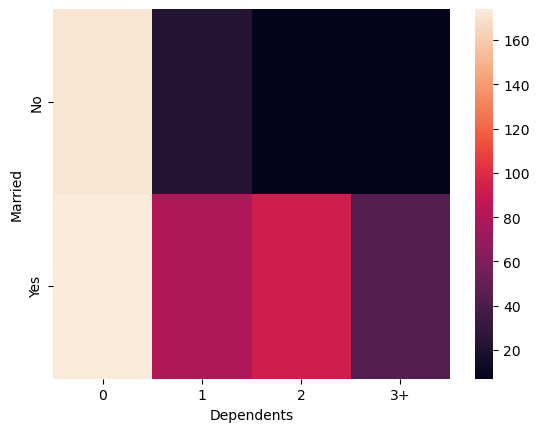

In [93]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Dependents"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Dependents"]))

#    Inferences:-

In [94]:
#majority of the Married is Yes with Dependents Status as 0 and very few married with no status with 2 dependents 

Education  Graduate  Not Graduate
Married                          
No              168            45
Yes             309            89


<Axes: xlabel='Education', ylabel='Married'>

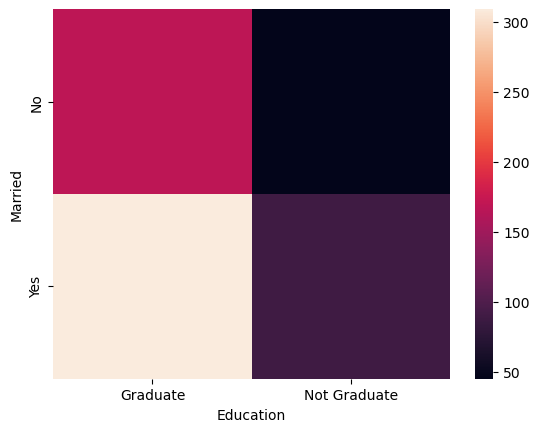

In [95]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Education"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Education"]))

# Inferences:-

In [96]:
#majority of the Married is Yes with Education Status as graduate and very few married with no status with not graduate 

Self_Employed   No  Yes
Married                
No             171   28
Yes            326   54


<Axes: xlabel='Self_Employed', ylabel='Married'>

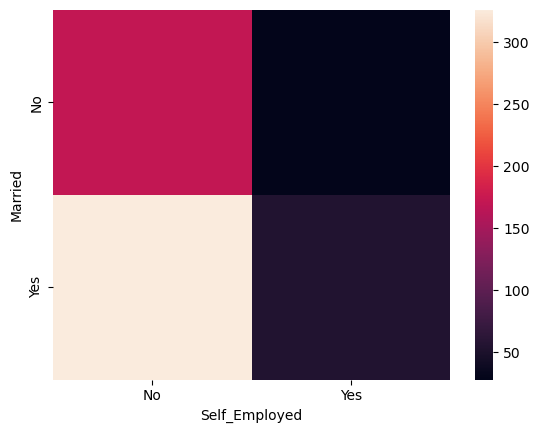

In [97]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Self_Employed"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Self_Employed"]))

# Inferences:-

In [98]:
#majority of the Married is Yes with Self_Employed Status as no and very few married with no status with yes

Property_Area  Rural  Semiurban  Urban
Married                               
No                63         80     70
Yes              116        151    131


<Axes: xlabel='Property_Area', ylabel='Married'>

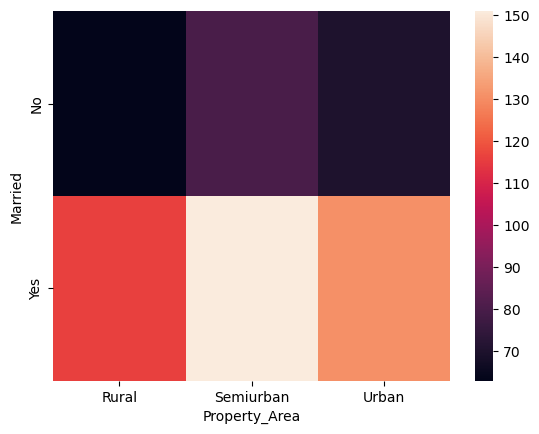

In [99]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Property_Area"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Property_Area"]))

# Inferences:-

In [100]:
#majority of the Married is Yes with property are Status as Semiurban and very few married with no status with Rural 

Loan_Amount_Term  12.0   36.0   60.0   84.0   120.0  180.0  240.0  300.0  \
Married                                                                    
No                    0      2      1      0      1      8      1      3   
Yes                   1      0      1      4      2     36      2     10   

Loan_Amount_Term  360.0  480.0  
Married                         
No                  183      9  
Yes                 328      5  


<Axes: xlabel='Loan_Amount_Term', ylabel='Married'>

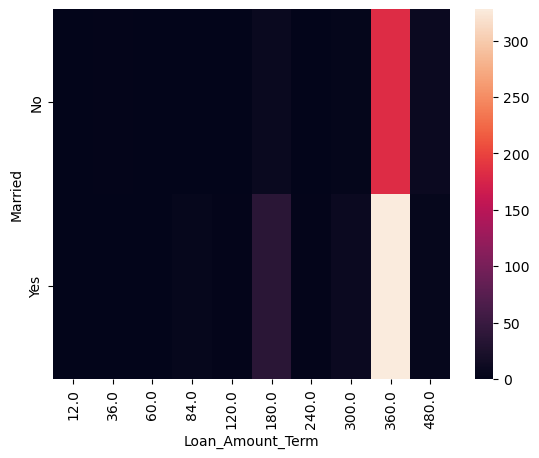

In [101]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Loan_Amount_Term"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Loan_Amount_Term"]))

# Inferences:-

In [102]:
#majority of the Married is Yes with Loan_Amount_Term Status as 360.0 and very few married with no status with other loan_amount_term status 

Credit_History  0.0  1.0
Married                 
No               32  167
Yes              57  305


<Axes: xlabel='Credit_History', ylabel='Married'>

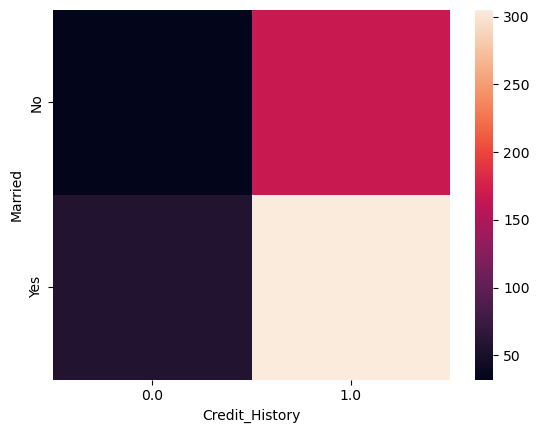

In [103]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Credit_History"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Credit_History"]))

# Inferences:-

In [104]:
#majority of the Married is Yes with Credit_history Status as 1.0 and very few married with no status with 0.0

Education   Graduate  Not Graduate
Dependents                        
0                275            70
1                 81            21
2                 77            24
3+                36            15


<Axes: xlabel='Education', ylabel='Dependents'>

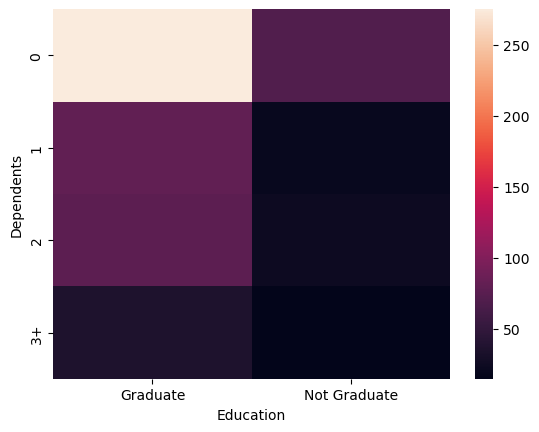

In [105]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Dependents"],df_data["Education"]))
sns.heatmap(pd.crosstab(df_data["Dependents"],df_data["Education"]))

# Inferences:-

In [106]:
#majority of the Dependents is 0 with Education Status as graduate and very few Dependents with 3+ status with Not graduate

Self_Employed   No  Yes
Dependents             
0              289   37
1               76   20
2               80   16
3+              42    7


<Axes: xlabel='Self_Employed', ylabel='Dependents'>

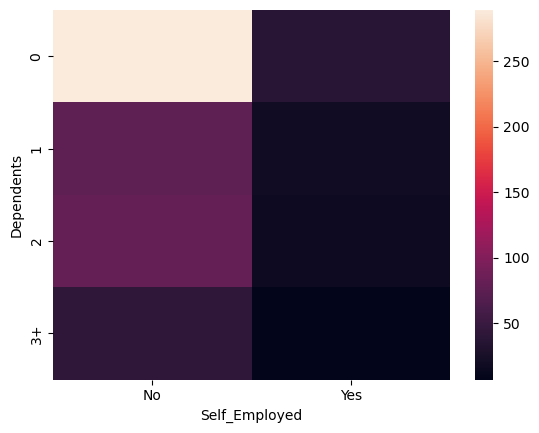

In [107]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Dependents"],df_data["Self_Employed"]))
sns.heatmap(pd.crosstab(df_data["Dependents"],df_data["Self_Employed"]))

# Inferences:-

In [108]:
#majority of the Dependents is 0 with Self employed Status as no and very few Dependents with 3+ status with yes

Property_Area  Rural  Semiurban  Urban
Dependents                            
0                109        130    106
1                 21         40     41
2                 29         37     35
3+                18         20     13


<Axes: xlabel='Property_Area', ylabel='Dependents'>

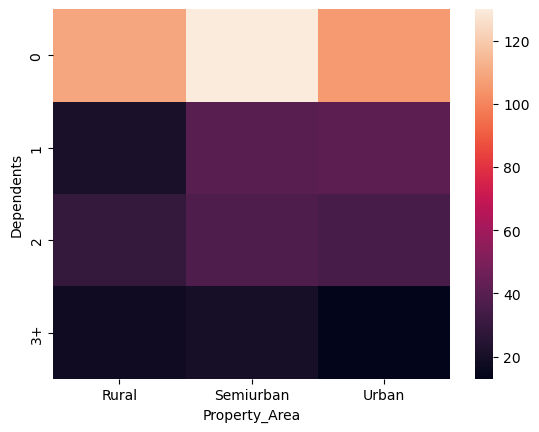

In [109]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Dependents"],df_data["Property_Area"]))
sns.heatmap(pd.crosstab(df_data["Dependents"],df_data["Property_Area"]))

# Inferences:-

In [110]:
#majority of the Dependents is 0 with Property_area Status as semiurban and very few Dependents with 3+ status with urban

Loan_Amount_Term  12.0   36.0   60.0   84.0   120.0  180.0  240.0  300.0  \
Dependents                                                                 
0                     1      1      1      0      2     18      0      6   
1                     0      1      0      2      0     11      2      2   
2                     0      0      0      2      1      6      1      3   
3+                    0      0      1      0      0      8      0      2   

Loan_Amount_Term  360.0  480.0  
Dependents                      
0                   296      9  
1                    82      1  
2                    86      2  
3+                   38      1  


<Axes: xlabel='Loan_Amount_Term', ylabel='Dependents'>

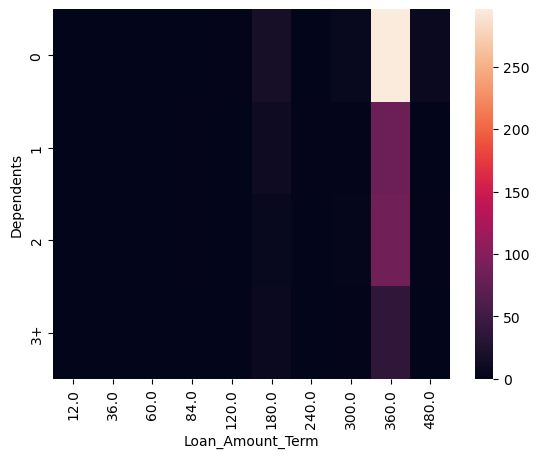

In [111]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Dependents"],df_data["Loan_Amount_Term"]))
sns.heatmap(pd.crosstab(df_data["Dependents"],df_data["Loan_Amount_Term"]))

# Inferences:-

In [112]:
#majority of the Dependents is 0 with laon amount term Status as 360.0 and very few Dependents with 3+ status with other loan amount term status

Credit_History  0.0  1.0
Dependents              
0                45  271
1                14   76
2                14   81
3+               11   37


<Axes: xlabel='Credit_History', ylabel='Dependents'>

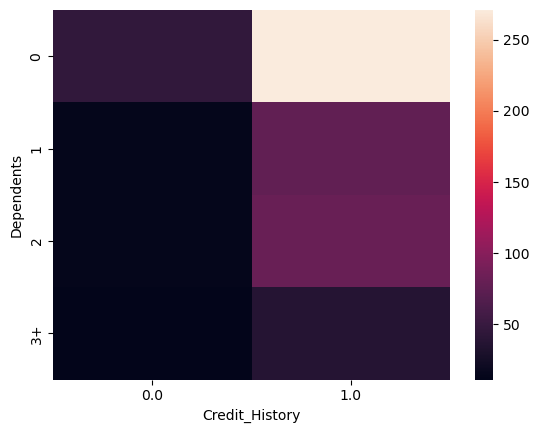

In [113]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Dependents"],df_data["Credit_History"]))
sns.heatmap(pd.crosstab(df_data["Dependents"],df_data["Credit_History"]))

# Inferences:-

In [114]:
#majority of the Dependents is 0 with Credit_history Status as 1.0 and very few Dependents with 3+ status with 0.0

Self_Employed   No  Yes
Education              
Graduate       389   65
Not Graduate   111   17


<Axes: xlabel='Self_Employed', ylabel='Education'>

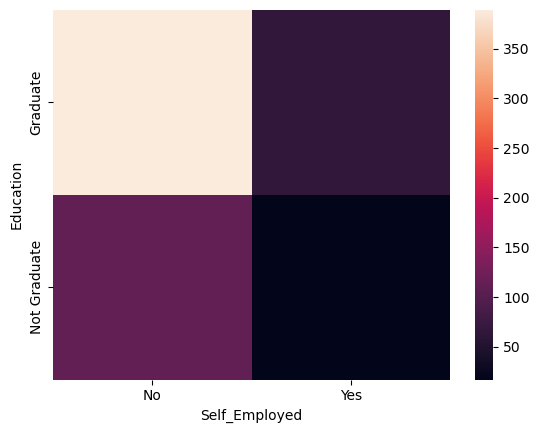

In [115]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Education"],df_data["Self_Employed"]))
sns.heatmap(pd.crosstab(df_data["Education"],df_data["Self_Employed"]))

# Inferences:-

In [116]:
#majority of the Education is graduate with self employed Status as no and very few education with not graduate status with yes

Property_Area  Rural  Semiurban  Urban
Education                             
Graduate         131        187    162
Not Graduate      48         46     40


<Axes: xlabel='Property_Area', ylabel='Education'>

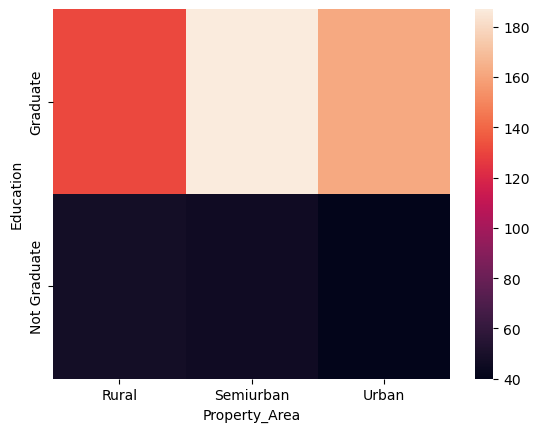

In [117]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Education"],df_data["Property_Area"]))
sns.heatmap(pd.crosstab(df_data["Education"],df_data["Property_Area"]))

# Inferences:-

In [118]:
#majority of the Education is graduate with Property_Area Status as semiurban and very few education with not graduate status with urban

Loan_Amount_Term  12.0   36.0   60.0   84.0   120.0  180.0  240.0  300.0  \
Education                                                                  
Graduate              1      1      1      4      2     28      3     10   
Not Graduate          0      1      1      0      1     16      1      3   

Loan_Amount_Term  360.0  480.0  
Education                       
Graduate            411     11  
Not Graduate        101      4  


<Axes: xlabel='Loan_Amount_Term', ylabel='Education'>

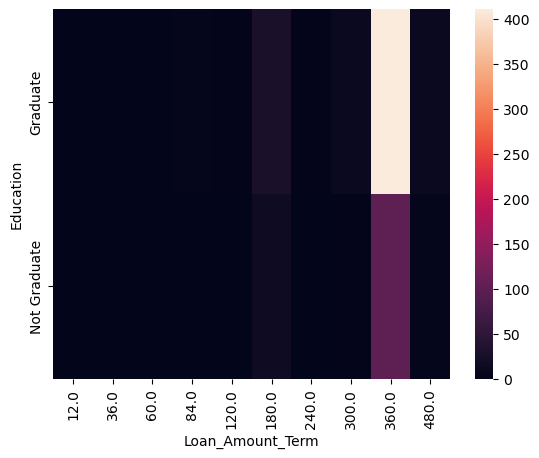

In [119]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Education"],df_data["Loan_Amount_Term"]))
sns.heatmap(pd.crosstab(df_data["Education"],df_data["Loan_Amount_Term"]))

# Inferences:- 

In [120]:
#majority of the Education is graduate with loan amount term Status as 360.0 and very few education with not graduate status with 0.0

Credit_History  0.0  1.0
Education               
Graduate         63  380
Not Graduate     26   95


<Axes: xlabel='Credit_History', ylabel='Education'>

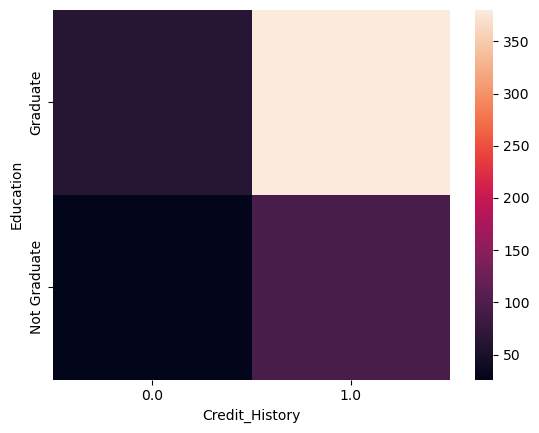

In [121]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Education"],df_data["Credit_History"]))
sns.heatmap(pd.crosstab(df_data["Education"],df_data["Credit_History"]))

# Inferences:-

In [122]:
#majority of the Education is graduate with credit_history Status as 1.0 and very few education with not graduate status with 0.0

Property_Area  Rural  Semiurban  Urban
Self_Employed                         
No               143        191    166
Yes               26         32     24


<Axes: xlabel='Property_Area', ylabel='Self_Employed'>

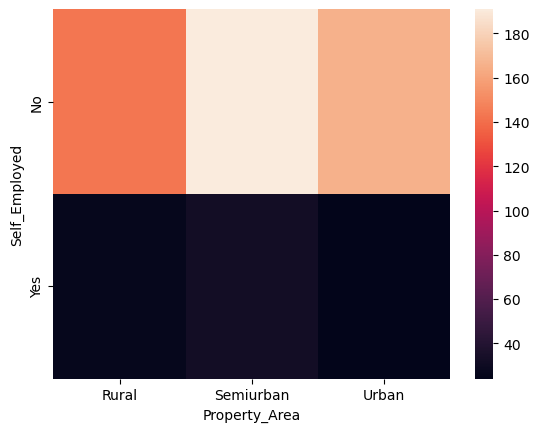

In [123]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Self_Employed"],df_data["Property_Area"]))
sns.heatmap(pd.crosstab(df_data["Self_Employed"],df_data["Property_Area"]))

# Inferences:-

In [124]:
#majority of the Self_Employed is no with Property_Area Status as semiurban and very few self employed with yes status with urban

Loan_Amount_Term  12.0   36.0   60.0   84.0   120.0  180.0  240.0  300.0  \
Self_Employed                                                              
No                    1      2      1      3      2     35      3     10   
Yes                   0      0      1      1      1      5      1      3   

Loan_Amount_Term  360.0  480.0  
Self_Employed                   
No                  418     14  
Yes                  67      1  


<Axes: xlabel='Loan_Amount_Term', ylabel='Self_Employed'>

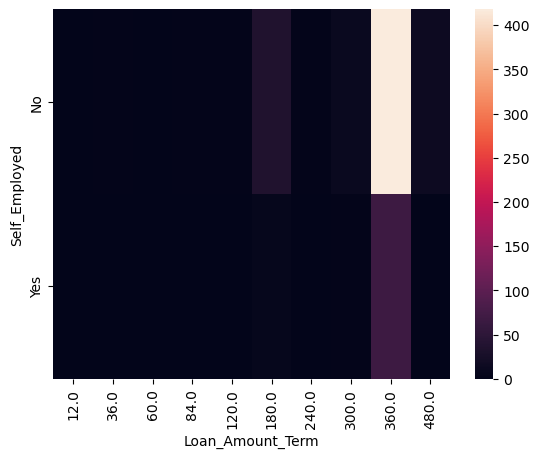

In [125]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Self_Employed"],df_data["Loan_Amount_Term"]))
sns.heatmap(pd.crosstab(df_data["Self_Employed"],df_data["Loan_Amount_Term"]))

# Inferences:-

In [126]:
#majority of the Self_Employed is no with loan amount term Status as 360.0 and very few self employed with yes status with other status

Credit_History  0.0  1.0
Self_Employed           
No               76  387
Yes              12   63


<Axes: xlabel='Credit_History', ylabel='Self_Employed'>

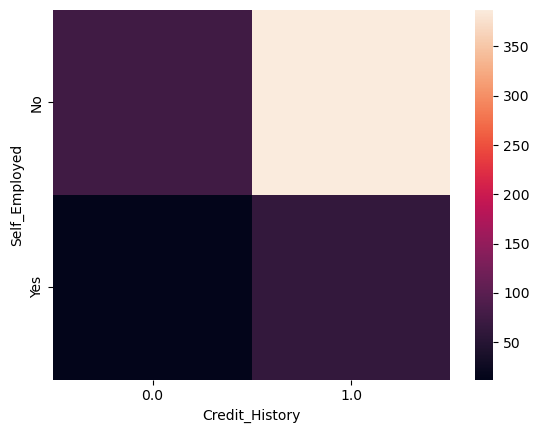

In [127]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Self_Employed"],df_data["Credit_History"]))
sns.heatmap(pd.crosstab(df_data["Self_Employed"],df_data["Credit_History"]))

# Inferences:-

In [128]:
#majority of the Self_Employed is no with credit history Status as 1.0 and very few self employed with yes status with 0.0

# CHECKING DEPENDENCY OF CATEGORICAL AND CONTINUOUS COLUMNS:- 

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

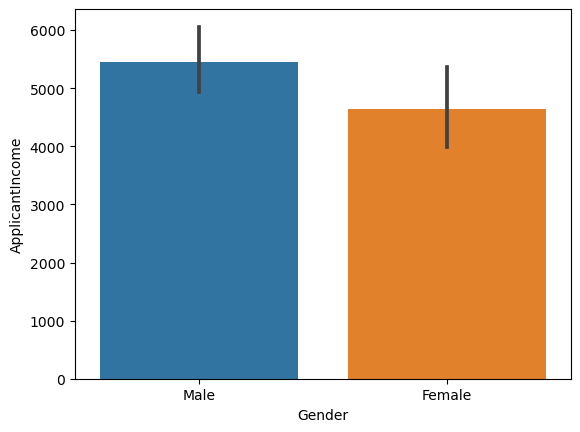

In [129]:
sns.barplot(x="Gender",y="ApplicantIncome",data=df_data)

# Inferences:-

In [130]:
#Male have the highest applicant imcome

<Axes: xlabel='Gender', ylabel='CoapplicantIncome'>

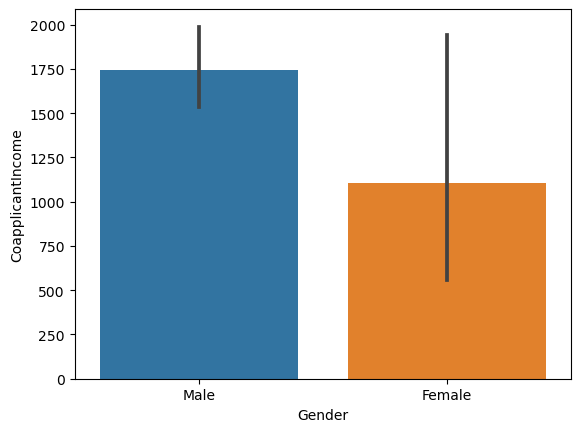

In [131]:
sns.barplot(x="Gender",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [132]:
#Male have the highest coapplicant income

<Axes: xlabel='Gender', ylabel='LoanAmount'>

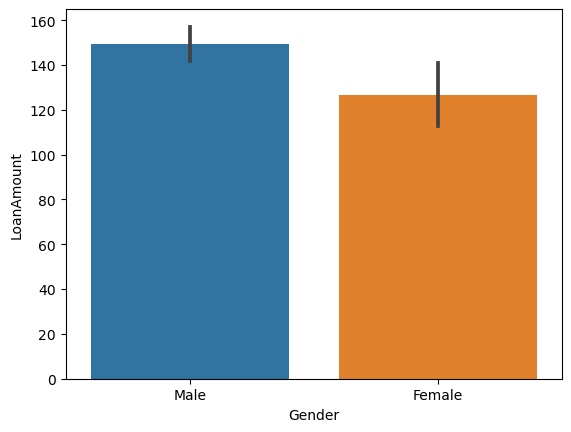

In [133]:
sns.barplot(x="Gender",y="LoanAmount",data=df_data)

# Inferences:-

In [134]:
#Male have the highest loanamount

<Axes: xlabel='Married', ylabel='ApplicantIncome'>

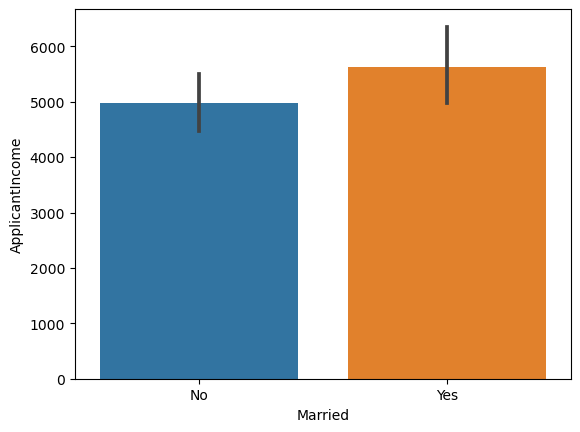

In [135]:
sns.barplot(x="Married",y="ApplicantIncome",data=df_data)

# Inferences:-

In [136]:
#Married=yes have the highest applicant income

<Axes: xlabel='Married', ylabel='CoapplicantIncome'>

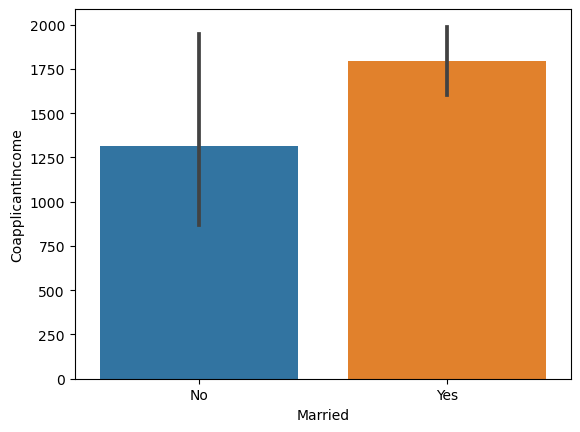

In [137]:
sns.barplot(x="Married",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [138]:
#Married=yes have the highest coapplicant income

<Axes: xlabel='Married', ylabel='LoanAmount'>

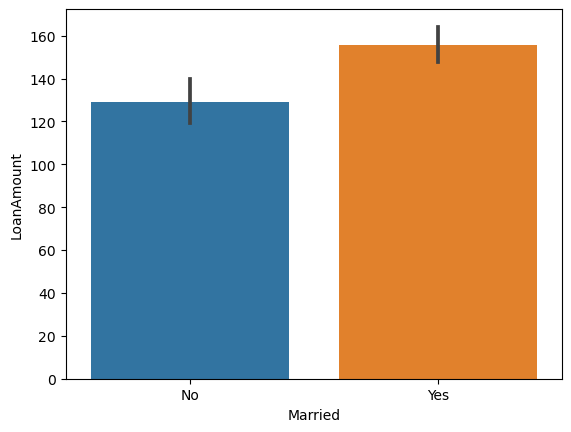

In [139]:
sns.barplot(x="Married",y="LoanAmount",data=df_data)

# Inferences:-

In [140]:
#Married=yes have the highest loan amount

<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

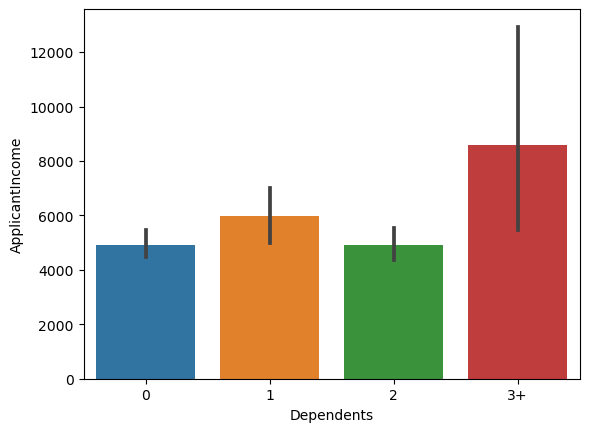

In [141]:
sns.barplot(x="Dependents",y="ApplicantIncome",data=df_data)

# Inferences:-

In [142]:
#Dependents=3+ have the highest applicant income

<Axes: xlabel='Dependents', ylabel='CoapplicantIncome'>

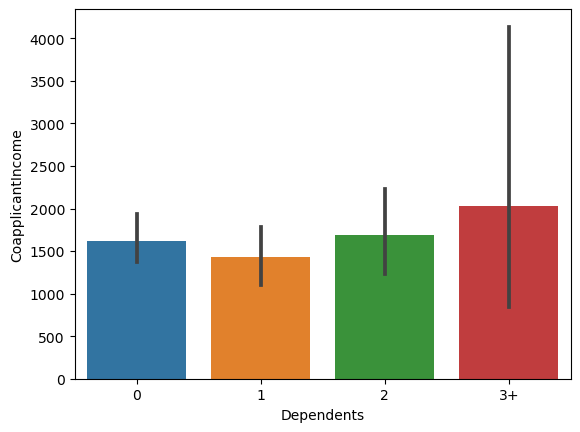

In [143]:
sns.barplot(x="Dependents",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [144]:
#Dependents=3+ have the highest coapplicant income

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

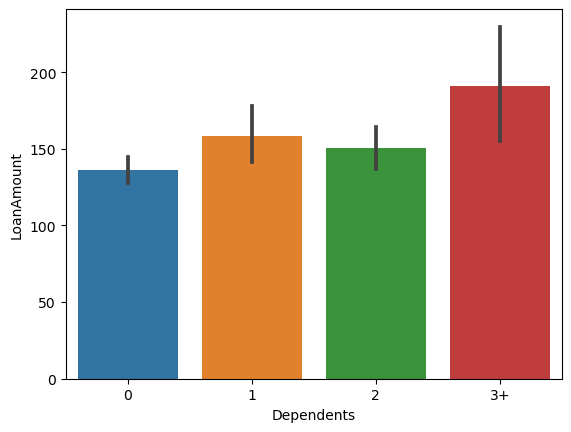

In [145]:
sns.barplot(x="Dependents",y="LoanAmount",data=df_data)

# Inferences:-

In [146]:
#Dependents=3+ have the highest loan amount

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

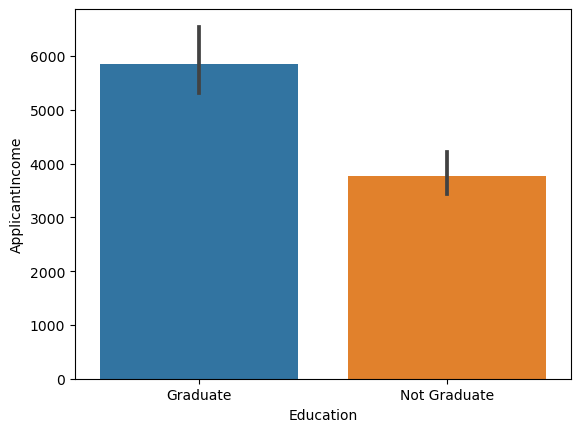

In [147]:
sns.barplot(x="Education",y="ApplicantIncome",data=df_data)

# Inferences:-

In [148]:
#graduate have the highest applicant income

<Axes: xlabel='Education', ylabel='CoapplicantIncome'>

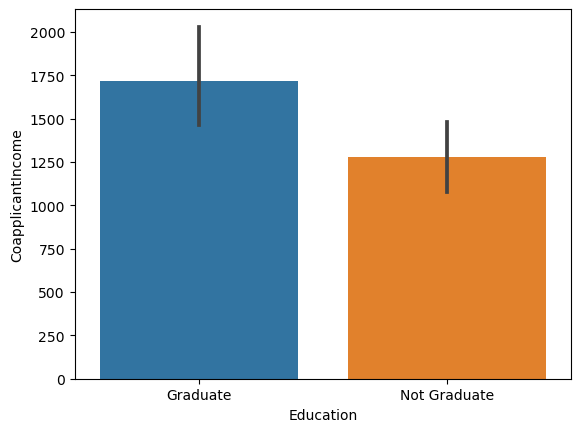

In [149]:
sns.barplot(x="Education",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [150]:
#graduate have the highest coapplicant income

<Axes: xlabel='Education', ylabel='LoanAmount'>

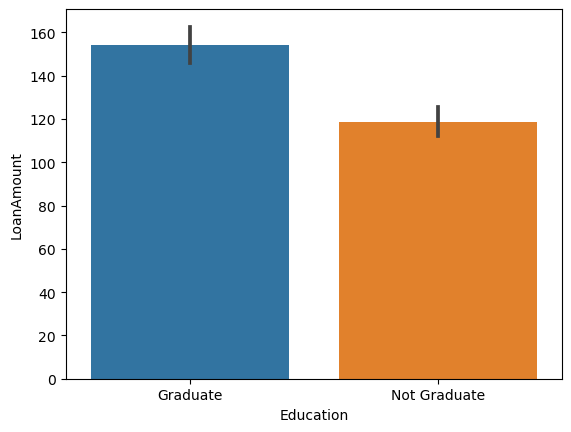

In [151]:
sns.barplot(x="Education",y="LoanAmount",data=df_data)

# Inferences:-

In [152]:
#graduate have the highest loanamount

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

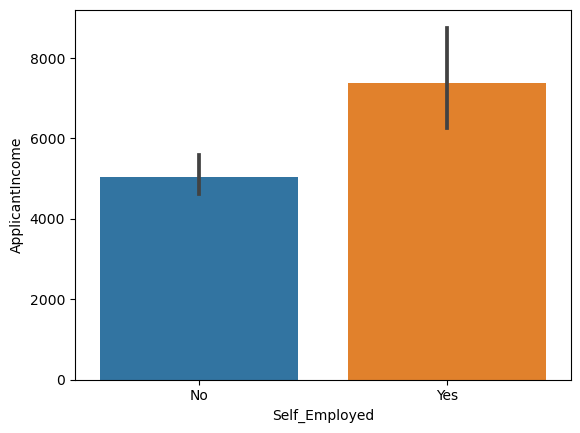

In [153]:
sns.barplot(x="Self_Employed",y="ApplicantIncome",data=df_data)

# Inferences:-

In [154]:
#self_employed=yes have the highest applicant income

<Axes: xlabel='Self_Employed', ylabel='CoapplicantIncome'>

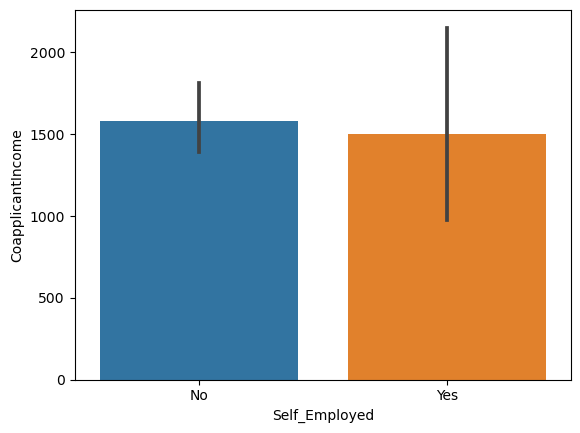

In [155]:
sns.barplot(x="Self_Employed",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [156]:
#self_employed=yes have the highest coapplicant income

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

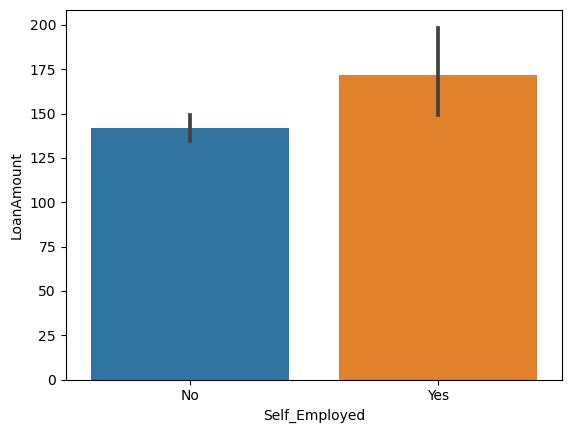

In [157]:
sns.barplot(x="Self_Employed",y="LoanAmount",data=df_data)

# Inferences:-

In [158]:
#self_employed=yes have the highest loan amount

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

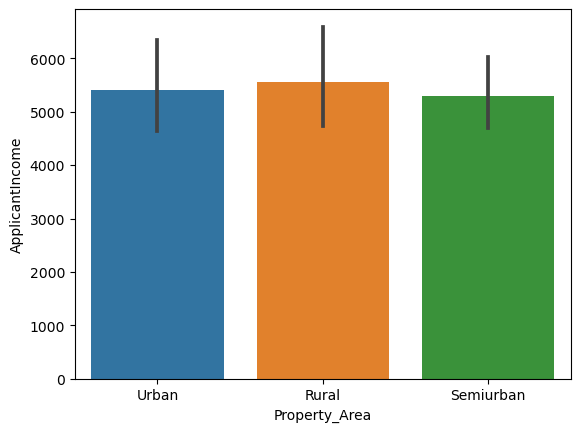

In [159]:
sns.barplot(x="Property_Area",y="ApplicantIncome",data=df_data)

# Inferences:-

In [160]:
#property_area=rural have the highest applicant income

<Axes: xlabel='Property_Area', ylabel='CoapplicantIncome'>

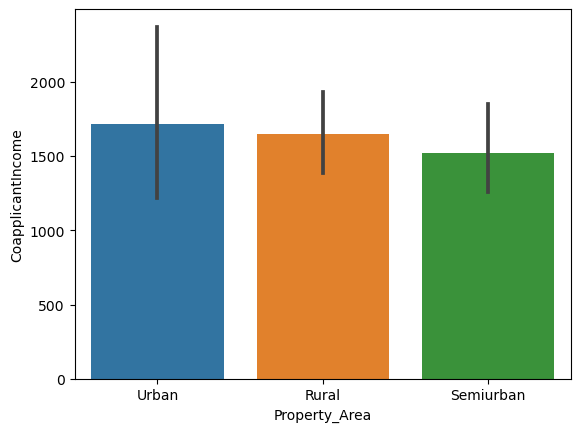

In [161]:
sns.barplot(x="Property_Area",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [162]:
#property_area=rural have the highest coapplicant income

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

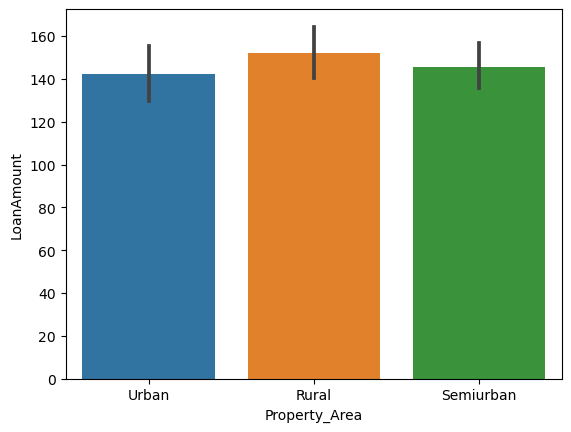

In [163]:
sns.barplot(x="Property_Area",y="LoanAmount",data=df_data)

# Inferences:-

In [164]:
#property_area=rural have the highest loanamount

<Axes: xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>

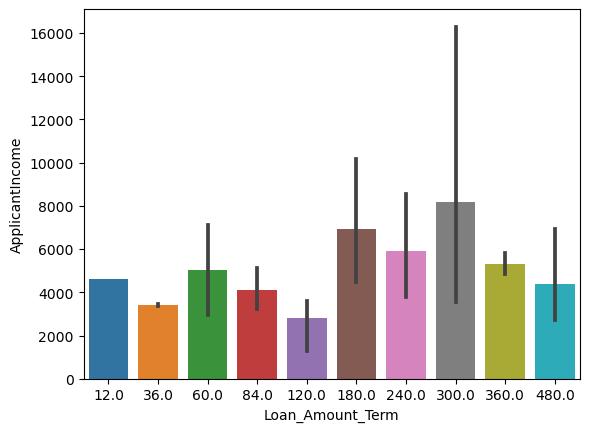

In [165]:
sns.barplot(x="Loan_Amount_Term",y="ApplicantIncome",data=df_data)

# Inferences:- 

In [166]:
#loan_amount_term=360.0 have the highest applicant income

<Axes: xlabel='Loan_Amount_Term', ylabel='CoapplicantIncome'>

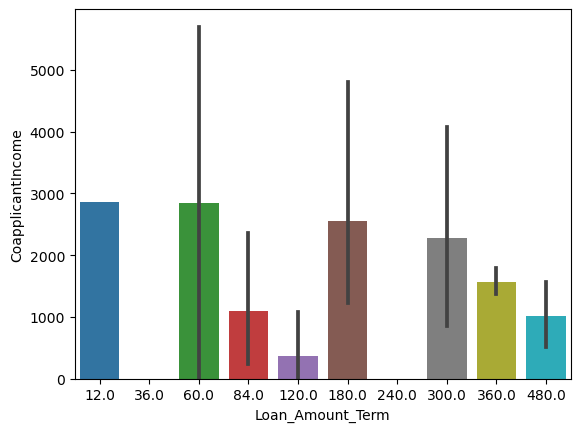

In [167]:
sns.barplot(x="Loan_Amount_Term",y="CoapplicantIncome",data=df_data)

# Inferences:- 

In [168]:
#loan_amount_term=12.0 have the highest coapplicant income

C:\Users\Devanshi Gahlot\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

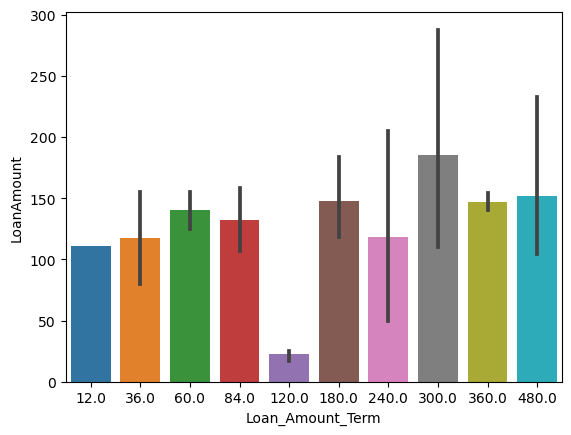

In [169]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df_data)

# Inferences:-

In [170]:
#loan_amount_term=360.0 have the highest loanamount

<Axes: xlabel='Credit_History', ylabel='ApplicantIncome'>

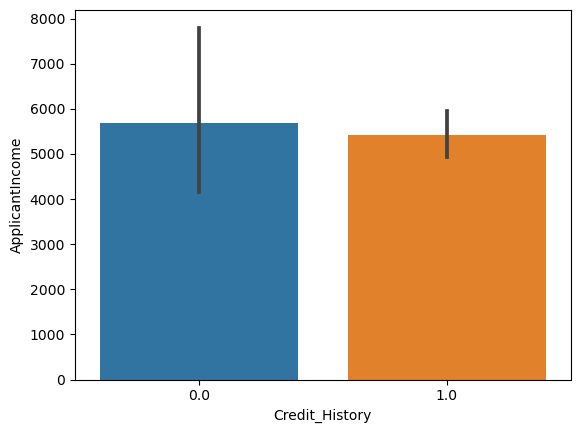

In [171]:
sns.barplot(x="Credit_History",y="ApplicantIncome",data=df_data)

# Inferences:-

In [172]:
#credit_history=0.0 have the highest applicant income

<Axes: xlabel='Credit_History', ylabel='CoapplicantIncome'>

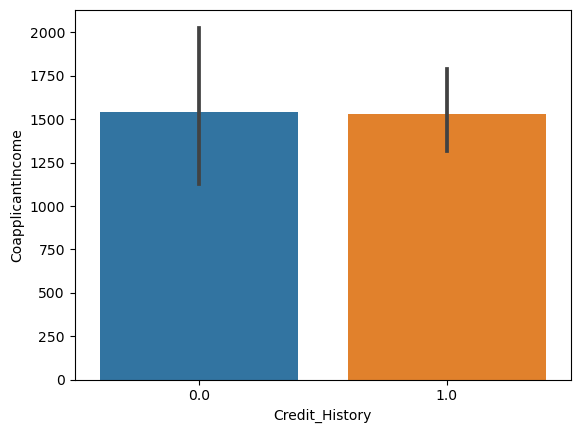

In [173]:
sns.barplot(x="Credit_History",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [174]:
#credit_history=0.0 and 1.0 have the same coapplicant income

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

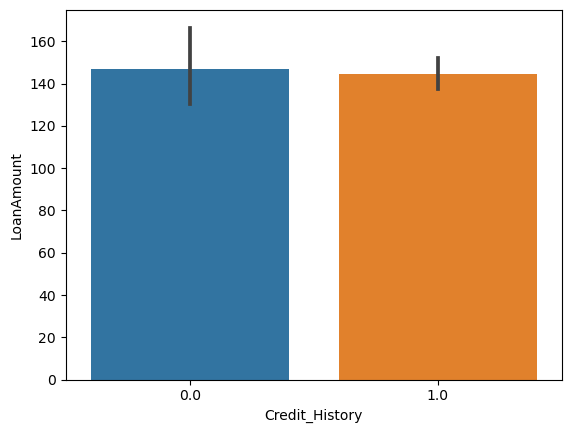

In [175]:
sns.barplot(x="Credit_History",y="LoanAmount",data=df_data)

# Inferences:-

In [176]:
#credit_history=0.0 have the highest loan amount

# 6.Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc


# ->Bi-varite Analysis Between Two Categorical Types:- 

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<Axes: xlabel='Loan_Status', ylabel='Gender'>

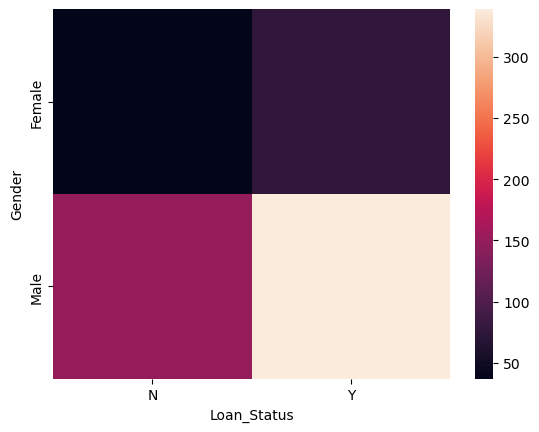

In [177]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Gender"],df_data["Loan_Status"]))
sns.heatmap(pd.crosstab(df_data["Gender"],df_data["Loan_Status"]))

# Inferences:-

In [178]:
#males are having the highest loan status as yes

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


<Axes: xlabel='Loan_Status', ylabel='Married'>

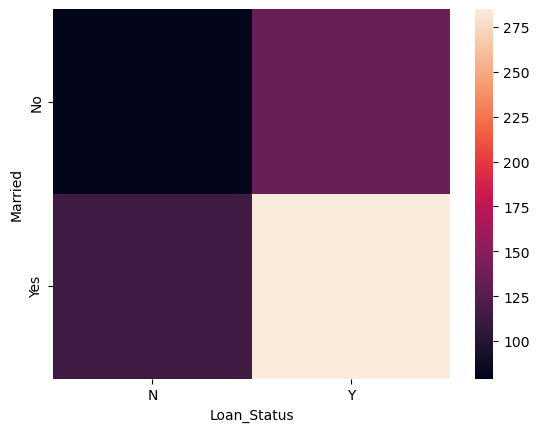

In [179]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Married"],df_data["Loan_Status"]))
sns.heatmap(pd.crosstab(df_data["Married"],df_data["Loan_Status"]))

# Inferences:-

In [180]:
#married=yes are having the highest loan status as yes

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


<Axes: xlabel='Loan_Status', ylabel='Dependents'>

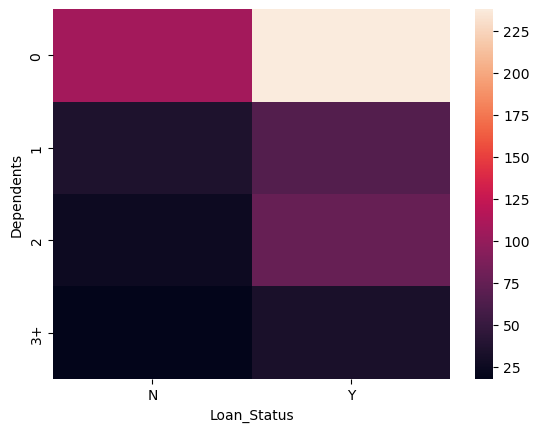

In [181]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Dependents"],df_data["Loan_Status"]))
sns.heatmap(pd.crosstab(df_data["Dependents"],df_data["Loan_Status"]))

# Inferences:-

In [182]:
#dependents=0 are having the highest loan status as yes

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


<Axes: xlabel='Loan_Status', ylabel='Education'>

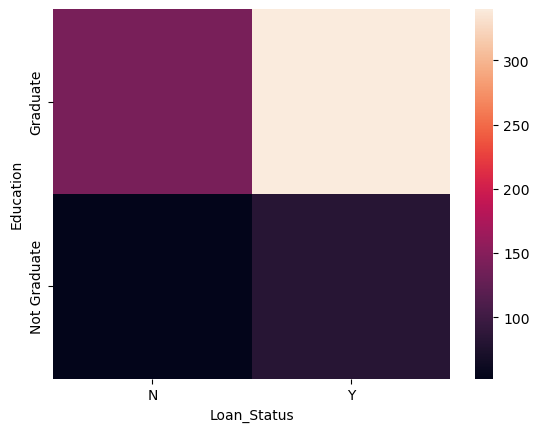

In [183]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Education"],df_data["Loan_Status"]))
sns.heatmap(pd.crosstab(df_data["Education"],df_data["Loan_Status"]))

# Inferences:-

In [184]:
#graduates are having the highest loan status as yes

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<Axes: xlabel='Loan_Status', ylabel='Self_Employed'>

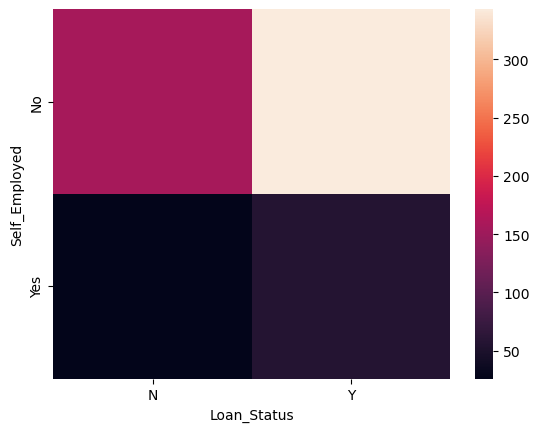

In [185]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Self_Employed"],df_data["Loan_Status"]))
sns.heatmap(pd.crosstab(df_data["Self_Employed"],df_data["Loan_Status"]))

# Inferences:-

In [186]:
#self_employed=yes are having the highest loan status as yes

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

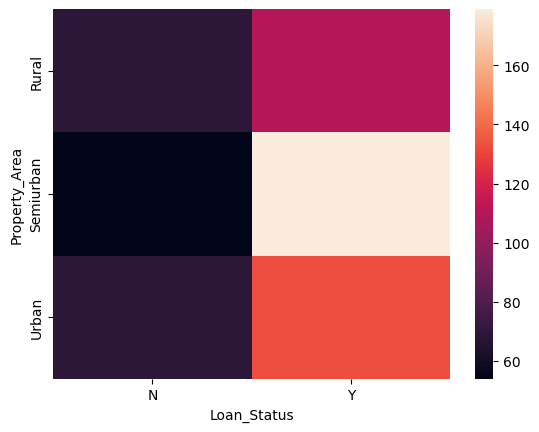

In [187]:
#Bivarite Analysis Between two categorical columns independent in nature:-
print(pd.crosstab(df_data["Property_Area"],df_data["Loan_Status"]))
sns.heatmap(pd.crosstab(df_data["Property_Area"],df_data["Loan_Status"]))

# Inferences:-

In [188]:
#property_area=semiurban are having the highest loan status as yes

# ->Bi-varite Analysis Between Categorical And ContinuousTypes:- 

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

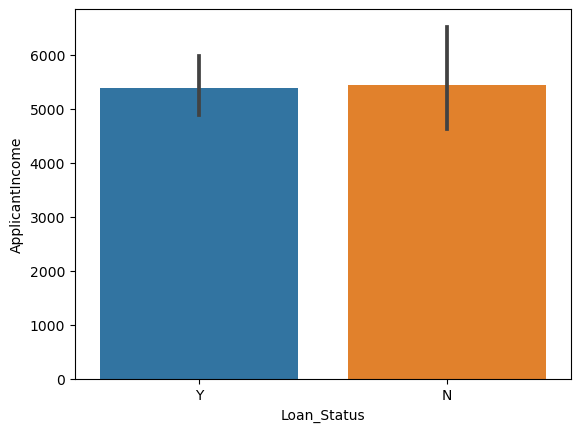

In [189]:
 sns.barplot(x="Loan_Status",y="ApplicantIncome",data=df_data)

# Inferences:-

In [190]:
#Applicants with loan status as no have highest applicant income

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

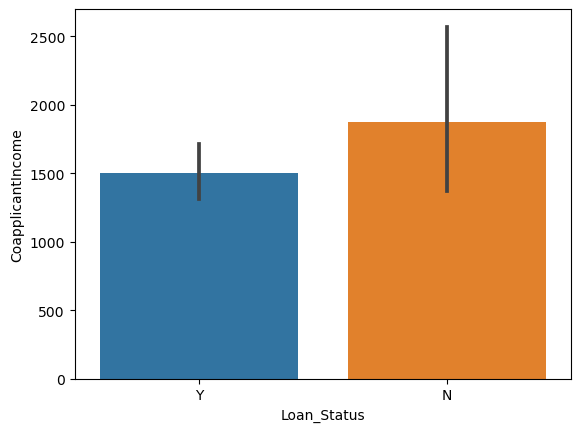

In [191]:
sns.barplot(x="Loan_Status",y="CoapplicantIncome",data=df_data)

# Inferences:-

In [192]:
#Applicants with loan status as no have highest coapplicant income

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

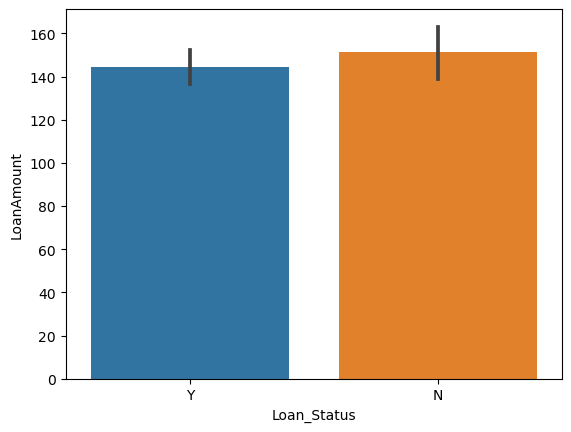

In [193]:
sns.barplot(x="Loan_Status",y="LoanAmount",data=df_data)

# Inferences:-

In [194]:
#Applicants with loan status as no have highest loanamount

# 7.How is the class distribution (Y/N) in Label(Target) Variable ?

Y    422
N    192
Name: Loan_Status, dtype: int64


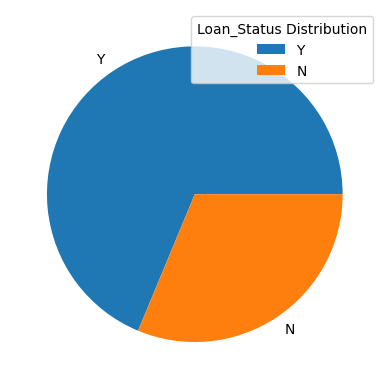

In [195]:
#To count the no.of Y/N in the Loan_Status Column and plotting it:-
ax=df_data["Loan_Status"].value_counts()
Mylabels=["Y","N"]
print(ax)
plt.pie(ax,labels=Mylabels)
plt.legend(title="Loan_Status Distribution")
plt.show()

In [196]:
#To Look more clearly how the Y/N are distributed for all the other features:-
df_data.groupby(by="Loan_Status").count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


# 8.Identify the Independent Variables that have missing values. 

In [197]:
print(df_data.isnull().sum())
print("")
print("")
df_data_columns_list=df_data.columns
feature_null_list=[feature for feature in df_data_columns_list if df_data[feature].isna().sum()>0]
print("The Independents Variables that have missing values:-")
print(feature_null_list)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


The Independents Variables that have missing values:-
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# 9.Handle missing values appropriately , explain the technique applied for each case

In [198]:
#The columns having Missing values are:-
print(feature_null_list)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [199]:
df2=df_data.copy() #Copying the dataset in the another

# TECHNIQUE USED:-
# For all the missing values in the categorical and continuous columns the approach I have used is the Replacing Categorical with the mode,Continuous with the median or mean(if outliners are handled)

# Handling missing value in the Gender column:-

In [200]:
#Now for the categorical column we are replacing the missing values with the most frequent value:-
print(df2["Gender"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["Gender"].value_counts()) #Analysing the different categories with count
print("")
print(df2["Gender"].mode()) #Analysing the mode in the column


13

Male      489
Female    112
Name: Gender, dtype: int64

0    Male
Name: Gender, dtype: object


In [201]:
df2["Gender"].fillna("Male",inplace=True)#Filling the missing values with the most frequent
df2["Gender"].isnull().sum()

0

# Handling missing value in the Married Column:-

In [202]:
#Now for the categorical column we are replacing the missing values with the most frequent value:-
print(df2["Married"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["Married"].value_counts()) #Analysing the different categories with count
print("")
print(df2["Married"].mode()) #Analysing the mode in the column


3

Yes    398
No     213
Name: Married, dtype: int64

0    Yes
Name: Married, dtype: object


In [203]:
df2["Married"].fillna("Yes",inplace=True)#Filling the missing values with the most frequent
df2["Married"].isnull().sum()

0

# Handling missing value in Dependents column:-

In [204]:
#Now for the categorical column we are replacing the missing values with the most frequent value:-
print(df2["Dependents"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["Dependents"].value_counts()) #Analysing the different categories with count
print("")
print(df2["Dependents"].mode()) #Analysing the mode in the column

15

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

0    0
Name: Dependents, dtype: object


In [205]:
df2["Dependents"].fillna("Yes",inplace=True)#Filling the missing values with the most frequent
df2["Dependents"].isnull().sum()

0

# Handling missing value in Self_Employed column:-

In [206]:
#Now for the categorical column we are replacing the missing values with the most frequent value:-
print(df2["Self_Employed"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["Self_Employed"].value_counts()) #Analysing the different categories with count
print("")
print(df2["Self_Employed"].mode()) #Analysing the mode in the column

32

No     500
Yes     82
Name: Self_Employed, dtype: int64

0    No
Name: Self_Employed, dtype: object


In [207]:
df2["Self_Employed"].fillna("Yes",inplace=True)#Filling the missing values with the most frequent
df2["Self_Employed"].isnull().sum()

0

# Handling missing value in the LoanAmount:- 

In [208]:
#Now for the Continuous column we are replacing the missing values with the most frequent value:-
print(df2["LoanAmount"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["LoanAmount"].mean()) #Analysing the mode in the column

22

146.41216216216216


In [209]:
df2["LoanAmount"].fillna("146.41216216216216",inplace=True)#Filling the missing values with the most frequent
df2["LoanAmount"].isnull().sum()

0

# Handling missing value in the Loan_Amount_Term:-

In [210]:
#Now for the Continuous column we are replacing the missing values with the most frequent value:-
print(df2["Loan_Amount_Term"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["Loan_Amount_Term"].mean()) #Analysing the mode in the column

14

342.0


In [211]:
df2["Loan_Amount_Term"].fillna("342.0",inplace=True)#Filling the missing values with the most frequent
df2["Loan_Amount_Term"].isnull().sum()

0

# Handling missing value in the Credit_History column:-

In [212]:
#Now for the Continuous column we are replacing the missing values with the most frequent value:-
print(df2["Credit_History"].isnull().sum()) #Analysing how many values are missing
print("")
print(df2["Credit_History"].mean()) #Analysing the mode in the column

50

0.8421985815602837


In [213]:
df2["Credit_History"].fillna("0.8421985815602837",inplace=True)#Filling the missing values with the most frequent
df2["Credit_History"].isnull().sum()

0

# 10.Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [214]:
df_cap=df_data.copy()

# Quartile bins (0-25%) on Applicant Column:-

In [215]:
df_data["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [216]:
upper_limit=df_cap.ApplicantIncome.quantile(0.25)
lower_limit=df_cap.ApplicantIncome.quantile(0.00)
print(lower_limit)
print(upper_limit)

150.0
2877.5


In [217]:
#Outliers in the Applicant Field:-
df_cap["ApplicantIncome"][(df_cap["ApplicantIncome"]>upper_limit)|(df_cap["ApplicantIncome"]<lower_limit)]

0      5849
1      4583
2      3000
4      6000
5      5417
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 460, dtype: int64

In [218]:
df_cap["ApplicantIncome"]=np.where(
    df_cap["ApplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["ApplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["ApplicantIncome"]))

In [219]:
#The data is distributed in the 0-25% quartile bin:-
df_cap["ApplicantIncome"].describe()

count     614.000000
mean     2713.263844
std       382.785920
min       150.000000
25%      2876.375000
50%      2877.500000
75%      2877.500000
max      2877.500000
Name: ApplicantIncome, dtype: float64

# Quartile bins (25%-50%) on Applicant Column:-

In [220]:
df_cap=df_data.copy()

In [221]:
df_data["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [222]:
upper_limit=df_cap.ApplicantIncome.quantile(0.50)
lower_limit=df_cap.ApplicantIncome.quantile(0.25)
print(lower_limit)
print(upper_limit)

2877.5
3812.5


In [223]:
#Outliers in the Applicant Field:-
df_cap["ApplicantIncome"][(df_cap["ApplicantIncome"]>upper_limit)|(df_cap["ApplicantIncome"]<lower_limit)]

0      5849
1      4583
3      2583
4      6000
5      5417
       ... 
607    3987
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 461, dtype: int64

In [224]:
df_cap["ApplicantIncome"]=np.where(
    df_cap["ApplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["ApplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["ApplicantIncome"]))

In [225]:
#The data is distributed in the 25-50% quartile bin:-
df_cap["ApplicantIncome"].describe()

count     614.000000
mean     3455.279316
std       412.417030
min      2877.500000
25%      2878.625000
50%      3812.250000
75%      3812.500000
max      3812.500000
Name: ApplicantIncome, dtype: float64

# Quartile bins (50%-75%) on Applicant Column:- 

In [226]:
df_cap=df_data.copy()

In [227]:
df_data["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [228]:
upper_limit=df_cap.ApplicantIncome.quantile(0.75)
lower_limit=df_cap.ApplicantIncome.quantile(0.50)
print(lower_limit)
print(upper_limit)

3812.5
5795.0


In [229]:
#Outliers in the Applicant Field:-
df_cap["ApplicantIncome"][(df_cap["ApplicantIncome"]>upper_limit)|(df_cap["ApplicantIncome"]<lower_limit)]

0      5849
2      3000
3      2583
4      6000
6      2333
       ... 
606    3400
608    3232
609    2900
611    8072
612    7583
Name: ApplicantIncome, Length: 461, dtype: int64

In [230]:
df_cap["ApplicantIncome"]=np.where(
    df_cap["ApplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["ApplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["ApplicantIncome"]))

In [231]:
#The data is distributed in the 50-75% quartile bin:-
df_cap["ApplicantIncome"].describe()

count     614.000000
mean     4512.590391
std       861.314161
min      3812.500000
25%      3812.500000
50%      3812.750000
75%      5791.250000
max      5795.000000
Name: ApplicantIncome, dtype: float64

# Quartile bins (75%-100%) on Applicant Column:- 

In [232]:
df_cap=df_data.copy()

In [233]:
df_data["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [234]:
upper_limit=df_cap.ApplicantIncome.quantile(1.00)
lower_limit=df_cap.ApplicantIncome.quantile(0.75)
print(lower_limit)
print(upper_limit)

5795.0
81000.0


In [235]:
#Outliers in the Applicant Field:-
df_cap["ApplicantIncome"][(df_cap["ApplicantIncome"]>upper_limit)|(df_cap["ApplicantIncome"]<lower_limit)]

1      4583
2      3000
3      2583
5      5417
6      2333
       ... 
607    3987
608    3232
609    2900
610    4106
613    4583
Name: ApplicantIncome, Length: 460, dtype: int64

In [236]:
df_cap["ApplicantIncome"]=np.where(
    df_cap["ApplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["ApplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["ApplicantIncome"]))

In [237]:
#The data is distributed in the 75-100% quartile bin:-
df_cap["ApplicantIncome"].describe()

count      614.000000
mean      7207.325733
std       5498.808062
min       5795.000000
25%       5795.000000
50%       5795.000000
75%       5798.750000
max      81000.000000
Name: ApplicantIncome, dtype: float64

# Quartile bins (0-25%) on Coapplicant Column:- 

In [238]:
df_cap=df_data.copy()

In [239]:
df_data["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [240]:
upper_limit=df_cap.CoapplicantIncome.quantile(0.25)
lower_limit=df_cap.CoapplicantIncome.quantile(0.00)
print(lower_limit)
print(upper_limit)

0.0
0.0


In [241]:
#Outliers in the Coapplicant Field:-
df_cap["CoapplicantIncome"][(df_cap["CoapplicantIncome"]>upper_limit)|(df_cap["CoapplicantIncome"]<lower_limit)]

1      1508.0
3      2358.0
5      4196.0
6      1516.0
7      2504.0
        ...  
605    3800.0
606    2500.0
607    1411.0
608    1950.0
611     240.0
Name: CoapplicantIncome, Length: 341, dtype: float64

In [242]:
df_cap["CoapplicantIncome"]=np.where(
    df_cap["CoapplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["CoapplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["CoapplicantIncome"]))

In [243]:
#The data is distributed in the 75-100% quartile bin:-
df_cap["CoapplicantIncome"].describe()

count    614.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: CoapplicantIncome, dtype: float64

# Quartile bins (25-50%) on Coapplicant Column:- 


In [244]:
df_cap=df_data.copy()

In [245]:
df_data["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [246]:
upper_limit=df_cap.CoapplicantIncome.quantile(0.50)
lower_limit=df_cap.CoapplicantIncome.quantile(0.25)
print(lower_limit)
print(upper_limit)

0.0
1188.5


In [247]:
#Outliers in the Coapplicant Field:-
df_cap["CoapplicantIncome"][(df_cap["CoapplicantIncome"]>upper_limit)|(df_cap["CoapplicantIncome"]<lower_limit)]

1      1508.0
3      2358.0
5      4196.0
6      1516.0
7      2504.0
        ...  
603    4301.0
605    3800.0
606    2500.0
607    1411.0
608    1950.0
Name: CoapplicantIncome, Length: 307, dtype: float64

In [248]:
df_cap["CoapplicantIncome"]=np.where(
    df_cap["CoapplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["CoapplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["CoapplicantIncome"]))

In [249]:
#The data is distributed in the 25-50% quartile bin:-
df_cap["CoapplicantIncome"].describe()

count     614.00000
mean      638.68798
std       582.81368
min         0.00000
25%         0.00000
50%      1177.75000
75%      1188.50000
max      1188.50000
Name: CoapplicantIncome, dtype: float64

# Quartile bins (50-75%) on Coapplicant Column:- 

In [250]:
df_cap=df_data.copy()

In [251]:
df_data["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [252]:
upper_limit=df_cap.CoapplicantIncome.quantile(0.75)
lower_limit=df_cap.CoapplicantIncome.quantile(0.50)
print(lower_limit)
print(upper_limit)

1188.5
2297.25


In [253]:
#Outliers in the Coapplicant Field:-
df_cap["CoapplicantIncome"][(df_cap["CoapplicantIncome"]>upper_limit)|(df_cap["CoapplicantIncome"]<lower_limit)]

0         0.0
2         0.0
3      2358.0
4         0.0
5      4196.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 461, dtype: float64

In [254]:
df_cap["CoapplicantIncome"]=np.where(
    df_cap["CoapplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["CoapplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["CoapplicantIncome"]))

In [255]:
#The data is distributed in the 50-75% quartile bin:-
df_cap["CoapplicantIncome"].describe()

count     614.000000
mean     1613.908795
std       485.553666
min      1188.500000
25%      1188.500000
50%      1199.250000
75%      2293.687500
max      2297.250000
Name: CoapplicantIncome, dtype: float64

# Quartile bins (75-100%) on Coapplicant Column:- 

In [256]:
df_cap=df_data.copy()

In [257]:
df_data["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [258]:
upper_limit=df_cap.CoapplicantIncome.quantile(1.00)
lower_limit=df_cap.CoapplicantIncome.quantile(0.75)
print(lower_limit)
print(upper_limit)

2297.25
41667.0


In [259]:
#Outliers in the Coapplicant Field:-
df_cap["CoapplicantIncome"][(df_cap["CoapplicantIncome"]>upper_limit)|(df_cap["CoapplicantIncome"]<lower_limit)]

0         0.0
1      1508.0
2         0.0
4         0.0
6      1516.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 460, dtype: float64

In [260]:
df_cap["CoapplicantIncome"]=np.where(
    df_cap["CoapplicantIncome"]>=upper_limit,upper_limit,
                 np.where(df_cap["CoapplicantIncome"]<=lower_limit,lower_limit,
                          df_cap["CoapplicantIncome"]))

In [261]:
#The data is distributed in the 75-100% quartile bin:-
df_cap["CoapplicantIncome"].describe()

count      614.000000
mean      2854.399023
std       2478.427060
min       2297.250000
25%       2297.250000
50%       2297.250000
75%       2300.812500
max      41667.000000
Name: CoapplicantIncome, dtype: float64

# Quartile bins (0-25%) on LoanAmount Column:- 

In [262]:
df_cap=df_data.copy()

In [263]:
df_data["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [264]:
upper_limit=df_cap.LoanAmount.quantile(0.25)
lower_limit=df_cap.LoanAmount.quantile(0.00)
print(lower_limit)
print(upper_limit)

9.0
100.0


In [265]:
#Outliers in the LoanAmount Field:-
df_cap["LoanAmount"][(df_cap["LoanAmount"]>upper_limit)|(df_cap["LoanAmount"]<lower_limit)]

1      128.0
3      120.0
4      141.0
5      267.0
7      158.0
       ...  
607    157.0
608    108.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 438, dtype: float64

In [266]:
df_cap["LoanAmount"]=np.where(
    df_cap["LoanAmount"]>=upper_limit,upper_limit,
                 np.where(df_cap["LoanAmount"]<=lower_limit,lower_limit,
                          df_cap["LoanAmount"]))

In [267]:
#The data is distributed in the 0-25% quartile bin:-
df_cap["LoanAmount"].describe()

count    592.000000
mean      93.733108
std       15.100556
min        9.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: LoanAmount, dtype: float64

# Quartile bins (25-50%) on LoanAmount Column:- 

In [268]:
df_cap=df_data.copy()

In [269]:
df_data["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [270]:
upper_limit=df_cap.LoanAmount.quantile(0.50)
lower_limit=df_cap.LoanAmount.quantile(0.25)
print(lower_limit)
print(upper_limit)

100.0
128.0


In [271]:
#Outliers in the LoanAmount Field:-
df_cap["LoanAmount"][(df_cap["LoanAmount"]>upper_limit)|(df_cap["LoanAmount"]<lower_limit)]

2       66.0
4      141.0
5      267.0
6       95.0
7      158.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 425, dtype: float64

In [272]:
df_cap["LoanAmount"]=np.where(
    df_cap["LoanAmount"]>=upper_limit,upper_limit,
                 np.where(df_cap["LoanAmount"]<=lower_limit,lower_limit,
                          df_cap["LoanAmount"]))

In [273]:
#The data is distributed in the 25-50% quartile bin:-
df_cap["LoanAmount"].describe()

count    592.000000
mean     117.518581
std       12.192880
min      100.000000
25%      100.000000
50%      128.000000
75%      128.000000
max      128.000000
Name: LoanAmount, dtype: float64

# Quartile bins (50-75%) on LoanAmount Column:- 


In [274]:
df_cap=df_data.copy()

In [275]:
df_data["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [276]:
upper_limit=df_cap.LoanAmount.quantile(0.75)
lower_limit=df_cap.LoanAmount.quantile(0.50)
print(lower_limit)
print(upper_limit)

128.0
168.0


In [277]:
#Outliers in the LoanAmount Field:-
df_cap["LoanAmount"][(df_cap["LoanAmount"]>upper_limit)|(df_cap["LoanAmount"]<lower_limit)]

2       66.0
3      120.0
5      267.0
6       95.0
9      349.0
       ...  
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
Name: LoanAmount, Length: 441, dtype: float64

In [278]:
df_cap["LoanAmount"]=np.where(
    df_cap["LoanAmount"]>=upper_limit,upper_limit,
                 np.where(df_cap["LoanAmount"]<=lower_limit,lower_limit,
                          df_cap["LoanAmount"]))

In [279]:
#The data is distributed in the 50-75% quartile bin:-
df_cap["LoanAmount"].describe()

count    592.000000
mean     142.010135
std       17.431225
min      128.000000
25%      128.000000
50%      128.000000
75%      168.000000
max      168.000000
Name: LoanAmount, dtype: float64

# 11.Use Box-Plot chart to represent the Outliers for each Independent Variable


<Axes: >

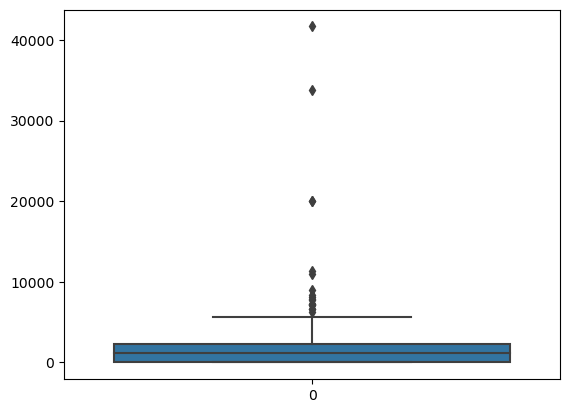

In [280]:
sns.boxplot(df_data["CoapplicantIncome"])

<Axes: >

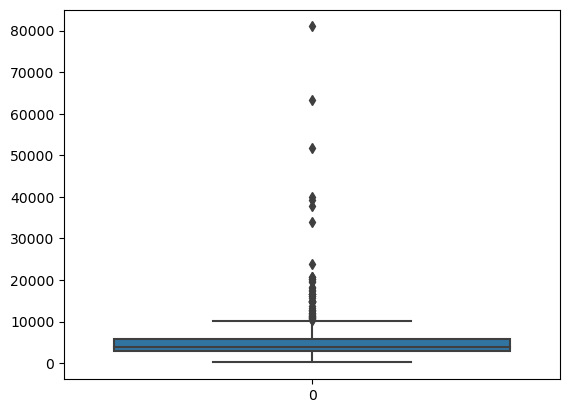

In [281]:
sns.boxplot(df_data["ApplicantIncome"])

<Axes: >

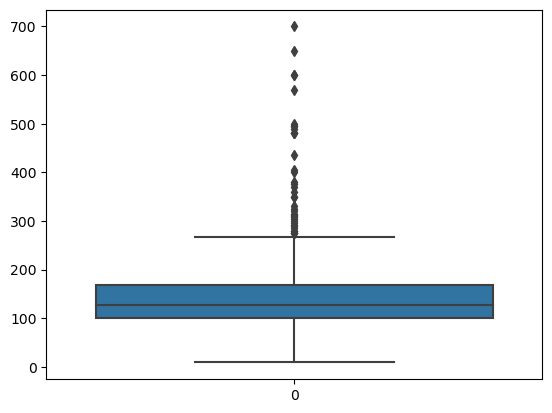

In [282]:
sns.boxplot(df_data["LoanAmount"])

# 12.Perform treatment of these Outliers using appropriate techniqies.Explain your approach


# Outliers In the ApplicantIncome Column

->THE RANGE I HAVE CHOSEN FOR THE DETECTION OF THE OUTLIERS IS BETWEEN 25-75%

In [283]:
df_new=df_data.copy()

In [284]:
upper_limit=df_new.ApplicantIncome.quantile(0.25)
lower_limit=df_new.ApplicantIncome.quantile(0.00)
print(lower_limit)
print(upper_limit)

150.0
2877.5


C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\3915190566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

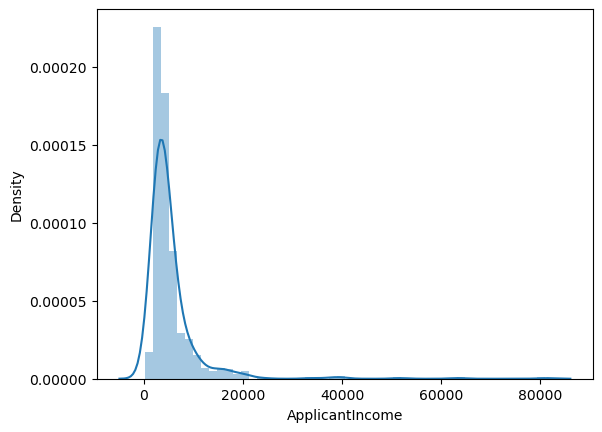

In [285]:
sns.distplot(df_new["ApplicantIncome"])

In [286]:
def find_boundaries(df,variables):
    #lets find the IQR (inter quantile range)
    Q1=df[variables].quantile(.25)
    Q3=df[variables].quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    return  lower_limit,upper_limit

In [287]:
lower_limit,upper_limit=find_boundaries(df_new,"ApplicantIncome")
print(upper_limit)
print(lower_limit)

10171.25
-1498.75


# REMOVING/TRIMMING THE OUTLIERS:-

In [288]:
outliers_ApplicantIncome=np.where(df_new["ApplicantIncome"]>upper_limit, True,
                                 np.where(df_new["ApplicantIncome"]<lower_limit,True,False))

In [289]:
outliers_ApplicantIncome

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,

In [290]:
df_new.shape

(614, 12)

In [291]:
engineered_data=df_new.loc[~(outliers_ApplicantIncome),]

In [292]:
engineered_data.shape

(564, 12)

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\1597698225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engineered_data["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

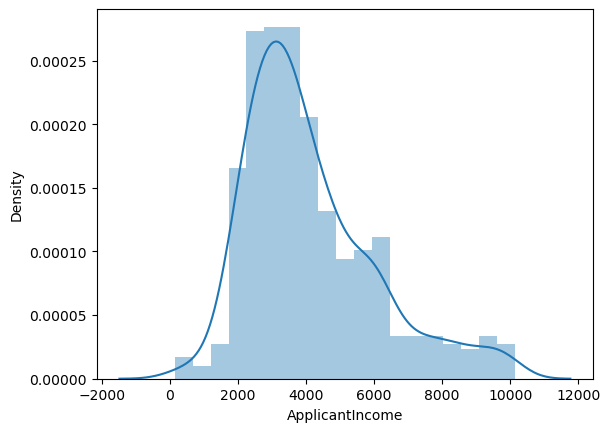

In [293]:
sns.distplot(engineered_data["ApplicantIncome"])

# Outliers In the CoapplicantIncome Column

->THE RANGE I HAVE CHOSEN FOR THE DETECTION OF THE OUTLIERS IS BETWEEN 25-75%

In [294]:
upper_limit=df_new.CoapplicantIncome.quantile(0.25)
lower_limit=df_new.CoapplicantIncome.quantile(0.00)
print(lower_limit)
print(upper_limit)

0.0
0.0


C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\3407282396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

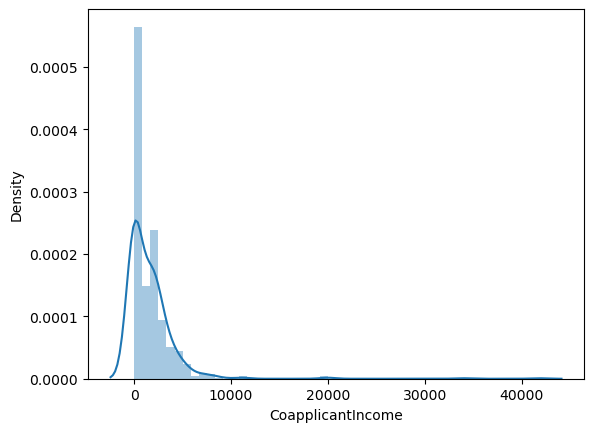

In [295]:
sns.distplot(df_new["CoapplicantIncome"])

# REMOVING/TRIMMING THE OUTLIERS:-

In [296]:
outliers_CoapplicantIncome=np.where(df_new["CoapplicantIncome"]>upper_limit, True,
                                 np.where(df_new["CoapplicantIncome"]<lower_limit,True,False))

In [297]:
df_new.shape

(614, 12)

In [298]:
engineered_data=df_new.loc[~(outliers_CoapplicantIncome),]

In [299]:
engineered_data.shape

(273, 12)

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\4192539441.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engineered_data["CoapplicantIncome"])
C:\Users\Devanshi Gahlot\anaconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

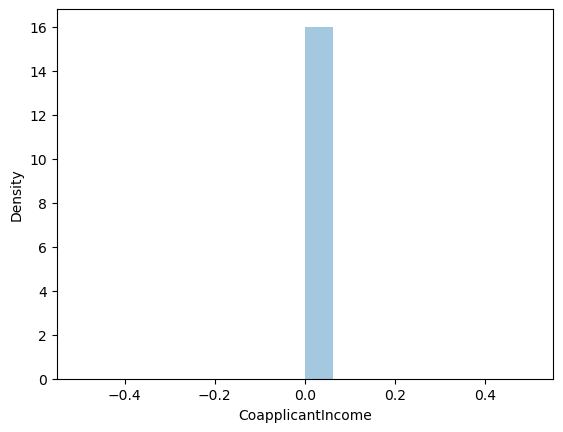

In [300]:
sns.distplot(engineered_data["CoapplicantIncome"])

# Outliers In the LoanAmount Column


->THE RANGE I HAVE CHOSEN FOR THE DETECTION OF THE OUTLIERS IS BETWEEN 25-75%

In [301]:
upper_limit=df_new.LoanAmount.quantile(0.25)
lower_limit=df_new.LoanAmount.quantile(0.00)
print(lower_limit)
print(upper_limit)

9.0
100.0


C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\3050850401.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

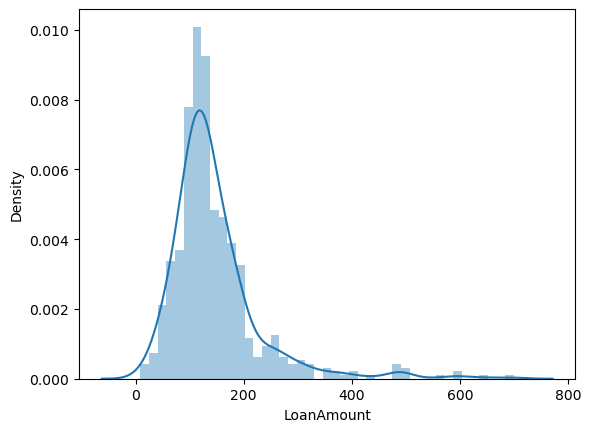

In [302]:
sns.distplot(df_new["LoanAmount"])

# REMOVING/TRIMMING THE OUTLIERS:-

In [303]:
outliers_LoanAmount=np.where(df_new["LoanAmount"]>upper_limit, True,
                                 np.where(df_new["LoanAmount"]<lower_limit,True,False))

In [304]:
df_new.shape

(614, 12)

In [305]:
engineered_data=df_new.loc[~(outliers_LoanAmount),]

In [306]:
engineered_data.shape

(176, 12)

C:\Users\Devanshi Gahlot\AppData\Local\Temp\ipykernel_14252\1590565166.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(engineered_data["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

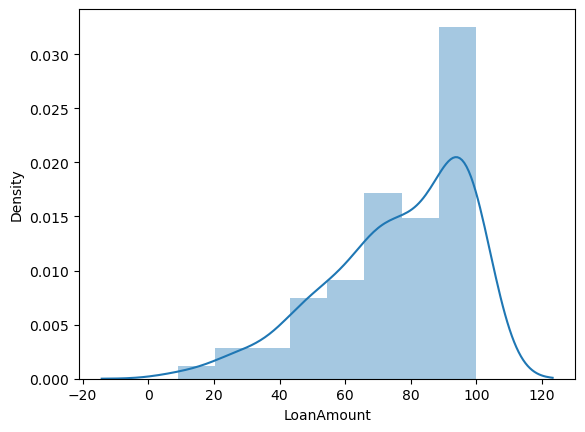

In [307]:
sns.distplot(engineered_data["LoanAmount"])